In [ ]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [ ]:
import tensorflow as tf
import numpy as np

# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

# create graph: model
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# create graph: loss
loss = tf.reduce_mean(tf.square(y - y_data))

# bind optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# run graph
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

In [ ]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

In [ ]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [ ]:
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.summary()

In [9]:
from keras.datasets import mnist
import keras

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [11]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.5074 - acc: 0.8632
Epoch 2/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.2615 - acc: 0.9255
Epoch 3/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.2153 - acc: 0.9392
Epoch 4/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.1846 - acc: 0.9468
Epoch 5/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.1608 - acc: 0.9542
Epoch 6/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.1433 - acc: 0.9578
Epoch 7/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.1297 - acc: 0.9621
Epoch 8/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.1189 - acc: 0.9653
Epoch 9/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.1096 - acc: 0.9681
Epoch 10/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.1020 - acc: 0.9696

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.122
Test Accuracy: 0.961


In [13]:
# recreating the model seems the only way to reset?
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.5489 - acc: 0.8510 - val_loss: 0.2458 - val_acc: 0.9322
Epoch 2/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.2570 - acc: 0.9283 - val_loss: 0.1832 - val_acc: 0.9522
Epoch 3/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.2088 - acc: 0.9413 - val_loss: 0.1603 - val_acc: 0.9557
Epoch 4/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.1804 - acc: 0.9493 - val_loss: 0.1474 - val_acc: 0.9565
Epoch 5/10
54000/54000 [==============================] - 1s 24us/step - loss: 0.1614 - acc: 0.9541 - val_loss: 0.1331 - val_acc: 0.9617
Epoch 6/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.1457 - acc: 0.9585 - val_loss: 0.1286 - val_acc: 0.9627
Epoch 7/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.1341 - acc: 0.9613 - val_loss: 0.1243 - val_acc:

In [ ]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=100, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 1s 27us/step - loss: 0.5226 - acc: 0.8604 - val_loss: 0.2416 - val_acc: 0.9328
Epoch 2/100
54000/54000 [==============================] - 1s 25us/step - loss: 0.2623 - acc: 0.9253 - val_loss: 0.1915 - val_acc: 0.9448
Epoch 3/100
54000/54000 [==============================] - 1s 26us/step - loss: 0.2148 - acc: 0.9382 - val_loss: 0.1608 - val_acc: 0.9562
Epoch 4/100
54000/54000 [==============================] - 1s 25us/step - loss: 0.1845 - acc: 0.9462 - val_loss: 0.1453 - val_acc: 0.9588
Epoch 5/100
54000/54000 [==============================] - 1s 26us/step - loss: 0.1628 - acc: 0.9529 - val_loss: 0.1359 - val_acc: 0.9620
Epoch 6/100
54000/54000 [==============================] - 1s 26us/step - loss: 0.1484 - acc: 0.9563 - val_loss: 0.1232 - val_acc: 0.9647
Epoch 7/100
54000/54000 [==============================] - 1s 26us/step - loss: 0.1352 - acc: 0.9606 - val_loss: 0.1210 - v

In [164]:
def plot_history(logger):
    df = pd.DataFrame(logger.history)
    df[['acc', 'val_acc']].plot()
    plt.ylabel("accuracy")
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel("loss")

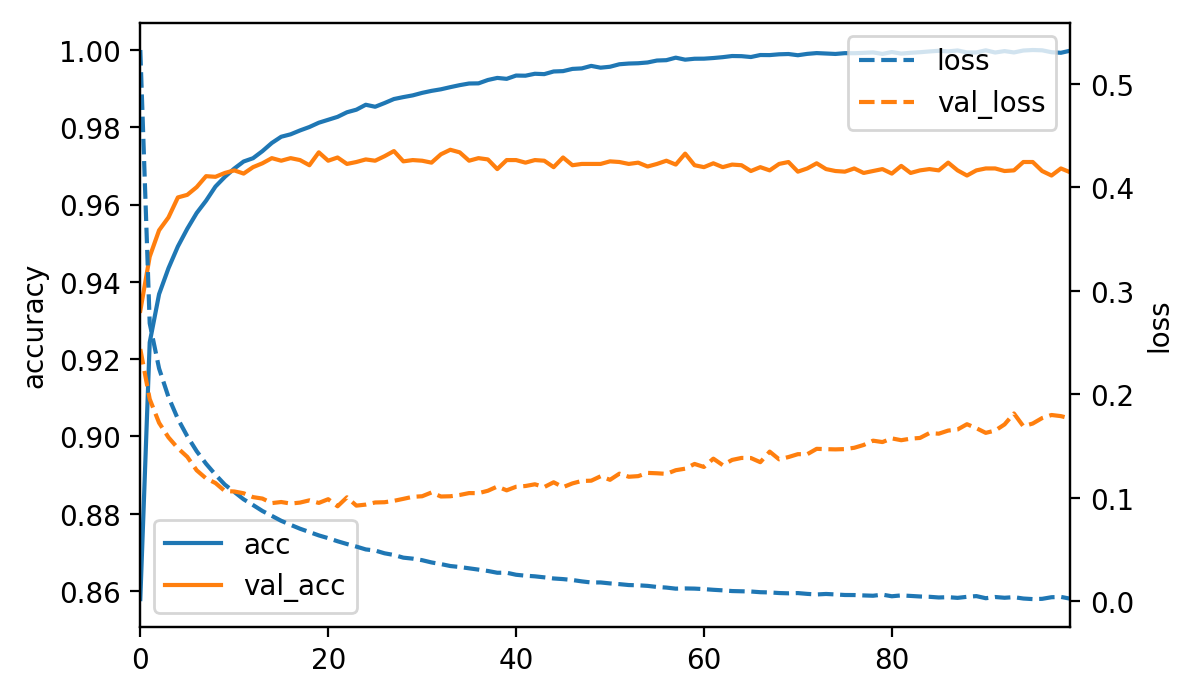

In [144]:
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

def make_model(optimizer="adam", hidden_size=32):
    model = Sequential([
        Dense(hidden_size, input_shape=(784,)),
        Activation('relu'),
        Dense(10),
        Activation('softmax'),
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)

param_grid = {'epochs': [1, 5, 10],  # epochs is fit parameter, not in make_model!
              'hidden_size': [32, 64, 256]}

grid = GridSearchCV(clf, param_grid=param_grid, cv=5)

In [29]:
grid.fit(X_train, y_train)

Epoch 1/1
48000/48000 [==============================] - 3s - loss: 0.3930 - acc: 0.8900     
Epoch 2/5
48000/48000 [==============================] - 2s - loss: 0.2084 - acc: 0.9402     
Epoch 3/5
48000/48000 [==============================] - 3s - loss: 0.1641 - acc: 0.9524     
Epoch 4/5
48000/48000 [==============================] - 2s - loss: 0.1367 - acc: 0.9606     
Epoch 5/5
48000/48000 [==============================] - 4s - loss: 0.3337 - acc: 0.9059     
Epoch 2/5
48000/48000 [==============================] - 4s - loss: 0.1606 - acc: 0.9522     
Epoch 3/5
48000/48000 [==============================] - 3s - loss: 0.1179 - acc: 0.9648     
Epoch 4/5
48000/48000 [==============================] - 3s - loss: 0.0930 - acc: 0.9722     
Epoch 5/5
48000/48000 [==============================] - 8s - loss: 0.2480 - acc: 0.9289     
Epoch 2/5
48000/48000 [==============================] - 8s - loss: 0.1040 - acc: 0.9691     
Epoch 3/5
48000/48000 [==============================] - 8s 

GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6ffea94160>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [33]:
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_epochs", "param_hidden_size"],
                values=['mean_train_score', "mean_test_score"])

mean_test_score  mean_train_score
param_epochs param_hidden_size                                   
1            32                        0.930017          0.935350
             64                        0.941433          0.948358
             256                       0.959117          0.966929
5            32                        0.956417          0.969746
             64                        0.967317          0.983113
             256                       0.973900          0.992196
10           32                        0.960100          0.979671
             64                        0.968617          0.992025
             256                       0.975050          0.996396

In [165]:

model = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128,
                    epochs=20, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 32s - loss: 0.2006 - acc: 0.9386 - val_loss: 0.1042 - val_acc: 0.9710
Epoch 2/20
54000/54000 [==============================] - 30s - loss: 0.0740 - acc: 0.9766 - val_loss: 0.0729 - val_acc: 0.9777
Epoch 3/20
54000/54000 [==============================] - 32s - loss: 0.0470 - acc: 0.9846 - val_loss: 0.0808 - val_acc: 0.9765
Epoch 4/20
54000/54000 [==============================] - 32s - loss: 0.0357 - acc: 0.9886 - val_loss: 0.0810 - val_acc: 0.9785
Epoch 5/20
54000/54000 [==============================] - 34s - loss: 0.0273 - acc: 0.9911 - val_loss: 0.0740 - val_acc: 0.9798
Epoch 6/20
54000/54000 [==============================] - 35s - loss: 0.0216 - acc: 0.9932 - val_loss: 0.0888 - val_acc: 0.9773
Epoch 7/20
54000/54000 [==============================] - 31s - loss: 0.0212 - acc: 0.9931 - val_loss: 0.0836 - val_acc: 0.9790
Epoch 8/20
54000/54000 [==============================]

In [186]:
score = model.evaluate(X_test, y_test, verbose=0)

In [187]:
score

[0.099523187893343537, 0.9819]

In [179]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_157 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_158 (Dense)            (None, 10)                10250     
Total params: 1,863,690.0
Trainable params: 1,863,690
Non-trainable params: 0.0
_________________________________________________________________


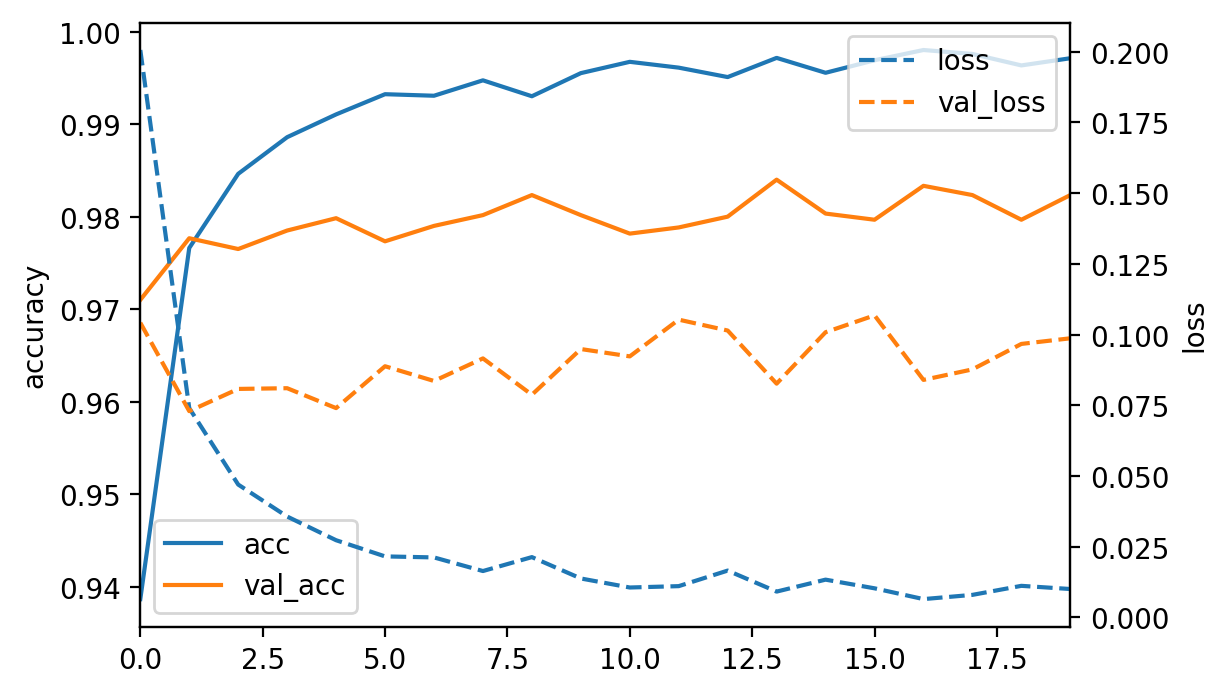

In [178]:
df = pd.DataFrame(history.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [163]:
from keras.layers import Dropout

model_dropout = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dropout(.5),
    Dense(1024, activation='relu'),
    Dropout(.5),
    Dense(10, activation='softmax'),
])
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=128,
                            epochs=20, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 34s - loss: 0.2924 - acc: 0.9100 - val_loss: 0.0991 - val_acc: 0.9723
Epoch 2/20
54000/54000 [==============================] - 31s - loss: 0.1420 - acc: 0.9554 - val_loss: 0.0782 - val_acc: 0.9762
Epoch 3/20
54000/54000 [==============================] - 29s - loss: 0.1098 - acc: 0.9657 - val_loss: 0.0699 - val_acc: 0.9792
Epoch 4/20
54000/54000 [==============================] - 30s - loss: 0.0963 - acc: 0.9694 - val_loss: 0.0655 - val_acc: 0.9802
Epoch 5/20
54000/54000 [==============================] - 30s - loss: 0.0849 - acc: 0.9736 - val_loss: 0.0628 - val_acc: 0.9802
Epoch 6/20
54000/54000 [==============================] - 29s - loss: 0.0722 - acc: 0.9776 - val_loss: 0.0617 - val_acc: 0.9823
Epoch 7/20
54000/54000 [==============================] - 29s - loss: 0.0707 - acc: 0.9771 - val_loss: 0.0636 - val_acc: 0.9820
Epoch 8/20
54000/54000 [==============================]

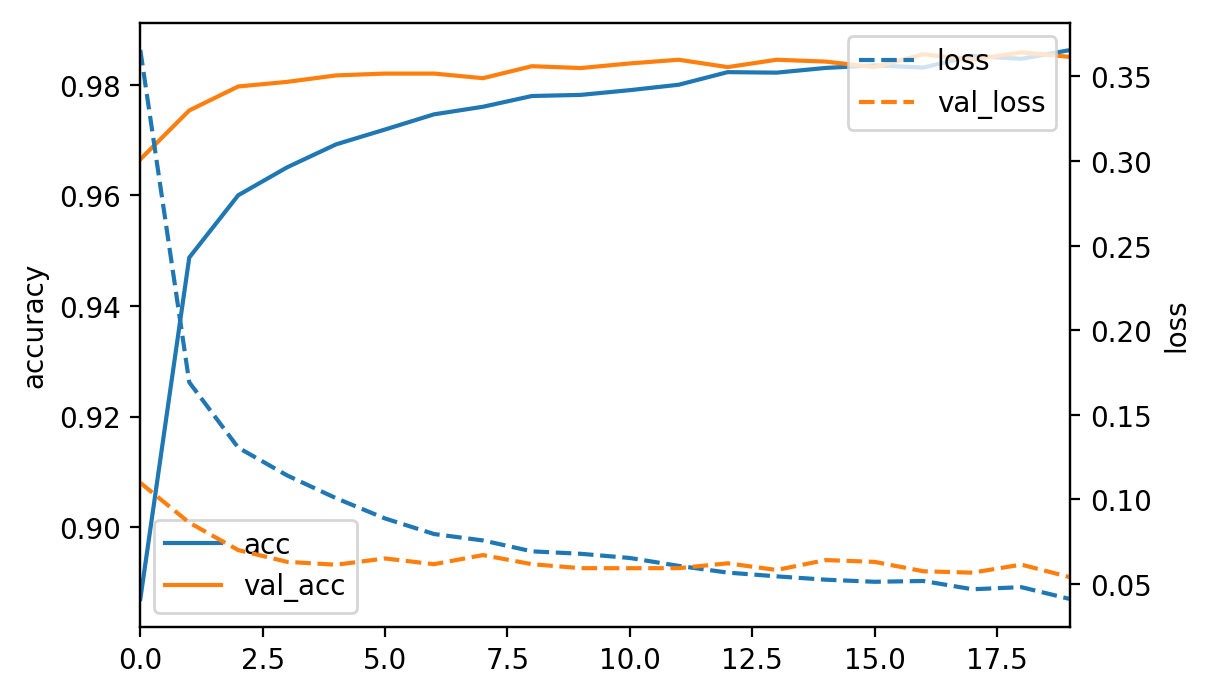

In [152]:
df = pd.DataFrame(history_dropout.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [166]:
score = model.evaluate(X_test, y_test, verbose=0)

In [167]:
score

[0.099523187893343537, 0.9819]

# Batch Normalization

In [198]:
from keras.layers import BatchNormalization

model_bn = Sequential([
    Dense(512, input_shape=(784,)),
    BatchNormalization(),
    Activation("relu"),
    Dense(512),
    BatchNormalization(),
    Activation("relu"),
    Dense(10, activation='softmax'),
])
model_bn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_bn = model.fit(X_train, y_train, batch_size=128,
                    epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s - loss: 0.0955 - acc: 0.9725 - val_loss: 0.0776 - val_acc: 0.9795
Epoch 2/10
54000/54000 [==============================] - 1s - loss: 0.0895 - acc: 0.9737 - val_loss: 0.0789 - val_acc: 0.9772
Epoch 3/10
54000/54000 [==============================] - 1s - loss: 0.0844 - acc: 0.9752 - val_loss: 0.0775 - val_acc: 0.9772
Epoch 4/10
54000/54000 [==============================] - 1s - loss: 0.0798 - acc: 0.9770 - val_loss: 0.0778 - val_acc: 0.9775
Epoch 5/10
54000/54000 [==============================] - 1s - loss: 0.0764 - acc: 0.9780 - val_loss: 0.0792 - val_acc: 0.9773
Epoch 6/10
54000/54000 [==============================] - 1s - loss: 0.0723 - acc: 0.9786 - val_loss: 0.0865 - val_acc: 0.9763
Epoch 7/10
54000/54000 [==============================] - 1s - loss: 0.0690 - acc: 0.9801 - val_loss: 0.0825 - val_acc: 0.9758
Epoch 8/10
54000/54000 [==============================] - 1s -

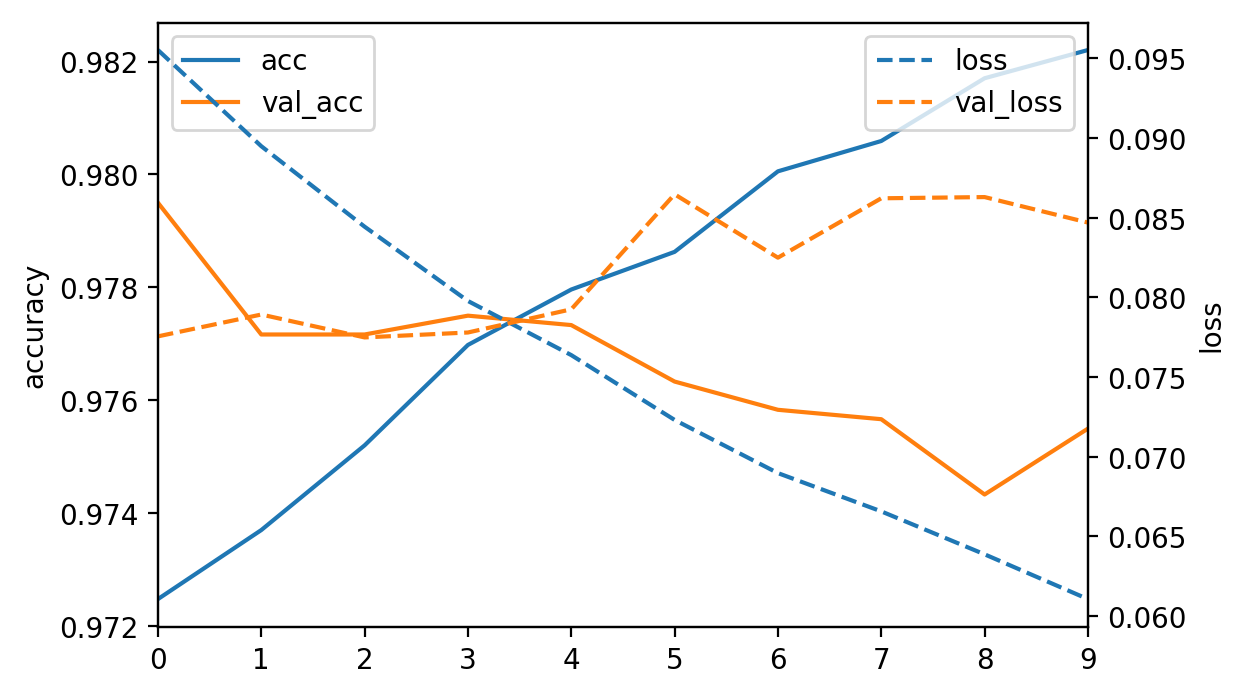

In [199]:
plot_history(history)

# Convolutions

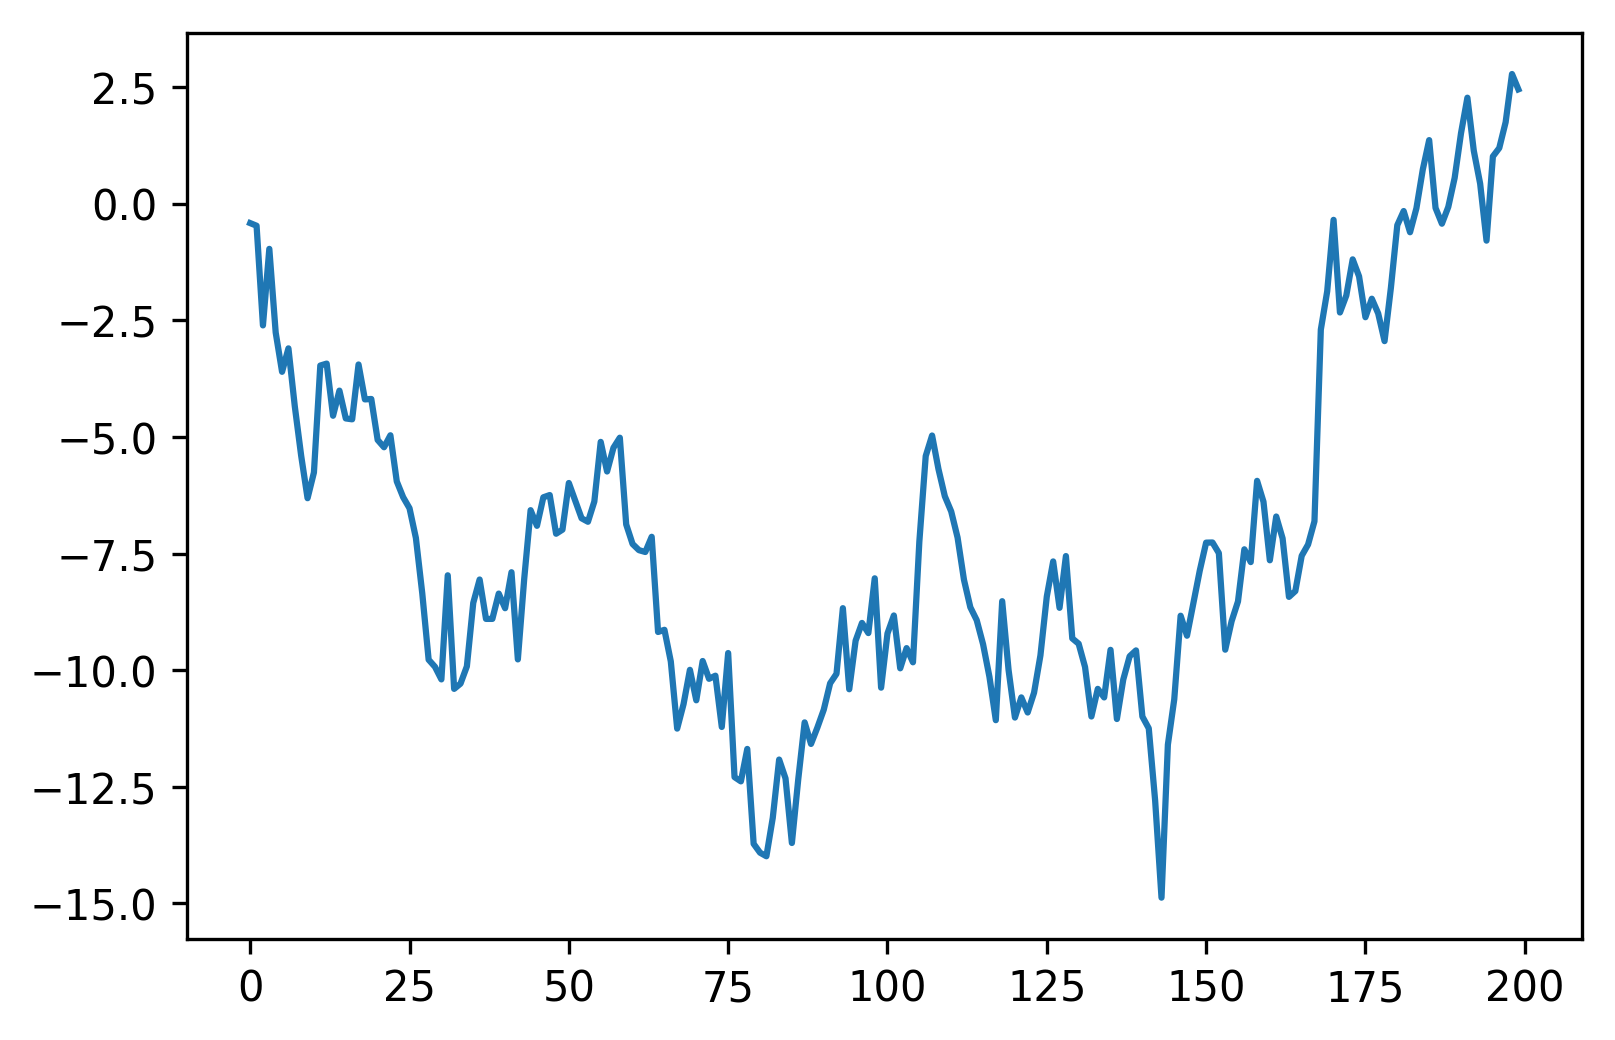

In [61]:
from scipy.ndimage import convolve
rng = np.random.RandomState(2)
signal = np.cumsum(rng.normal(size=200))
plt.plot(signal)

array([ 0.003,  0.009,  0.021,  0.044,  0.077,  0.117,  0.149,  0.162,
        0.149,  0.117,  0.077,  0.044,  0.021,  0.009,  0.003])

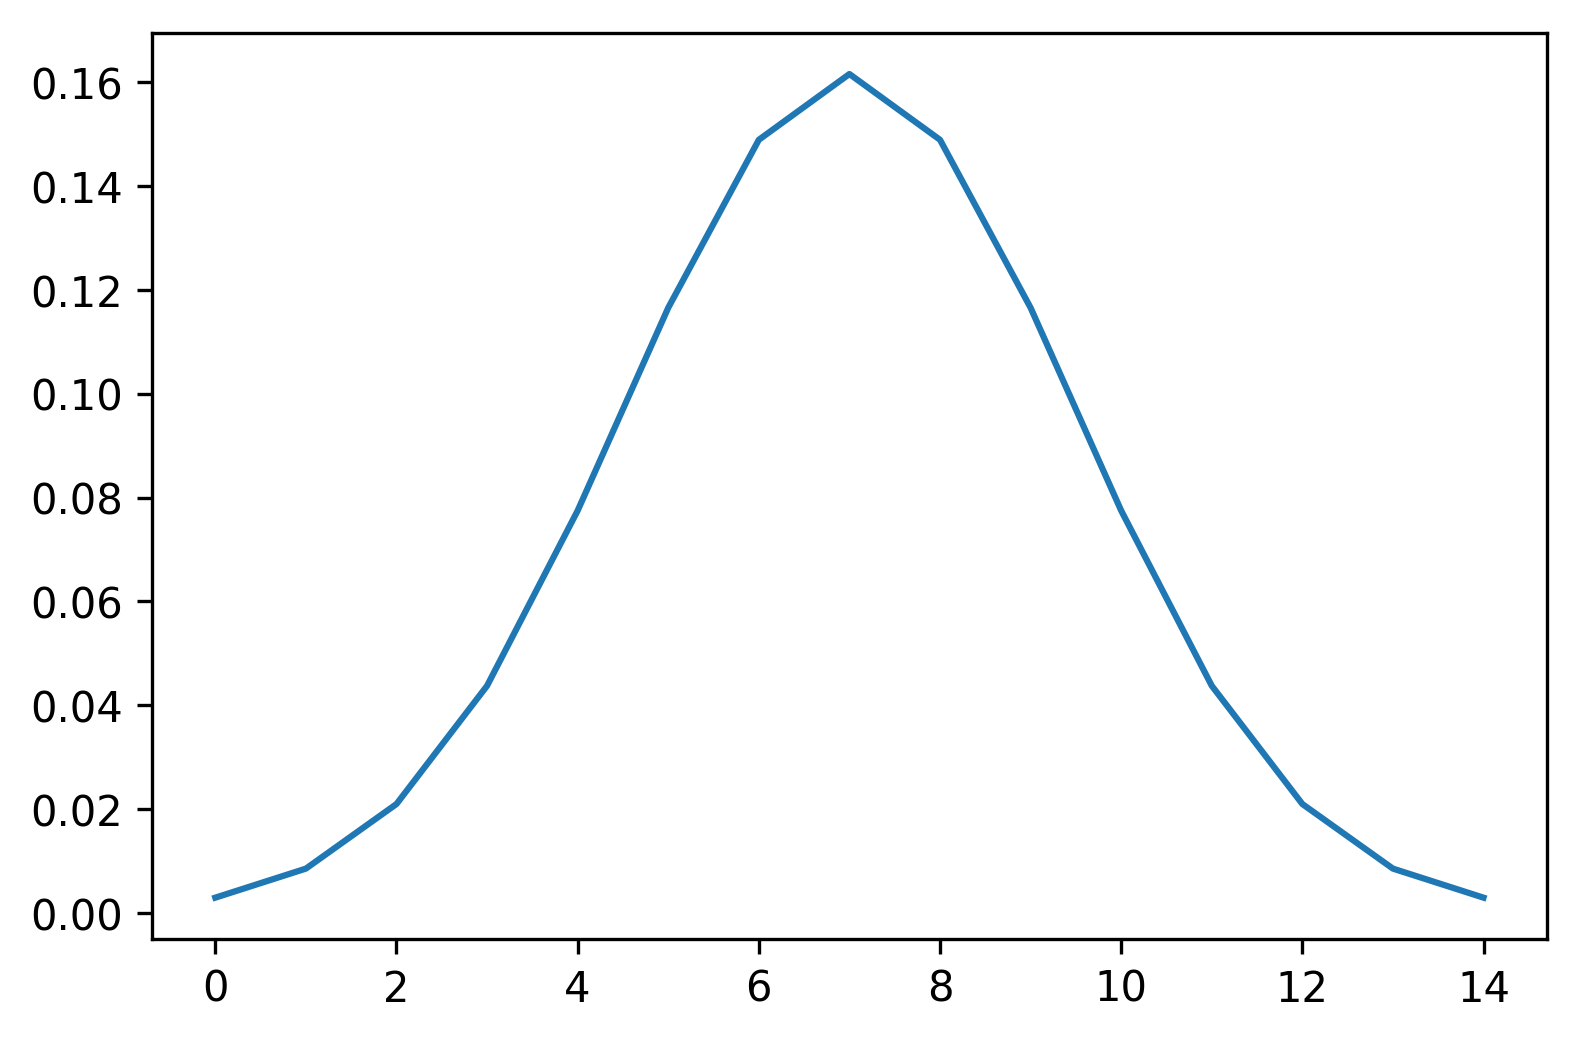

In [100]:
gaussian_filter = np.exp(-np.linspace(-2, 2, 15) ** 2)
gaussian_filter /= gaussian_filter.sum()
plt.plot(gaussian_filter)
gaussian_filter

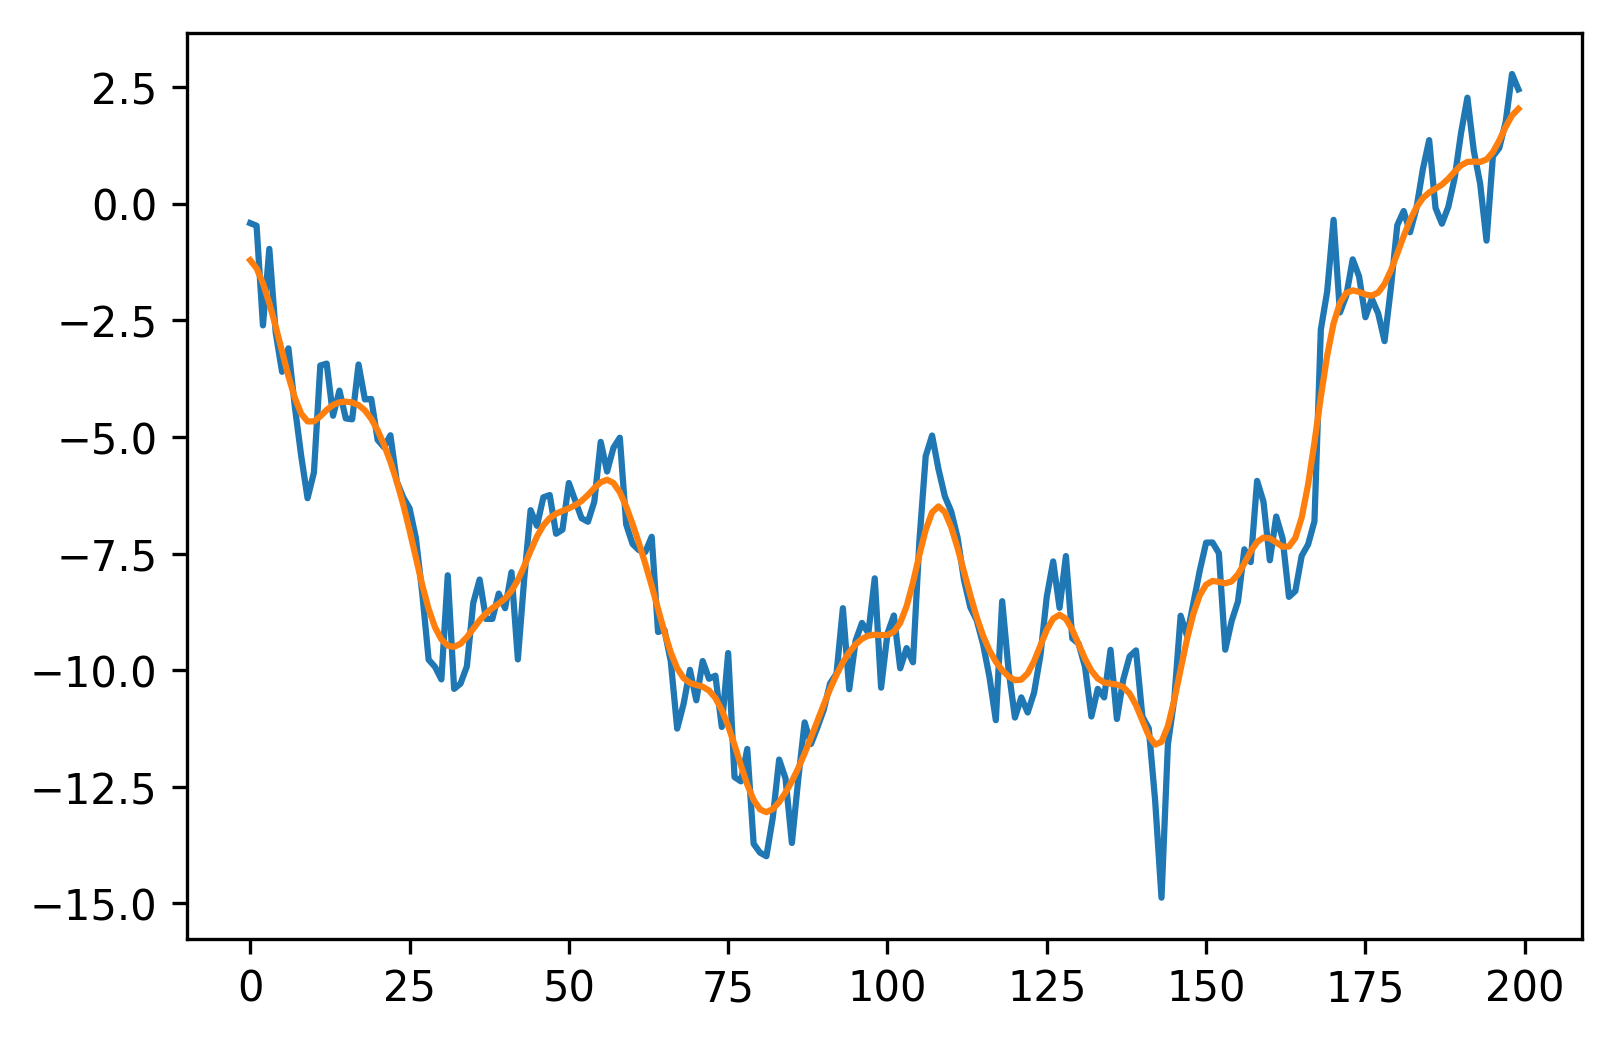

In [101]:
plt.plot(signal)
plt.plot(convolve(signal, gaussian_filter))

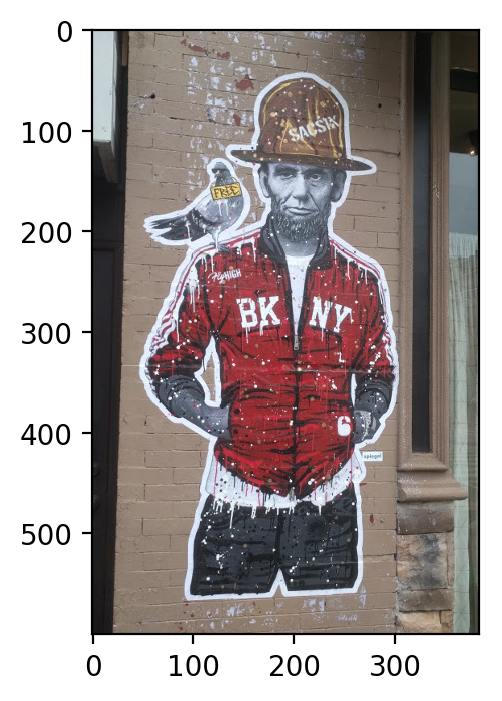

In [110]:
from scipy.misc import imread
image = imread("IMG_20170207_090931.jpg")
plt.imshow(image)

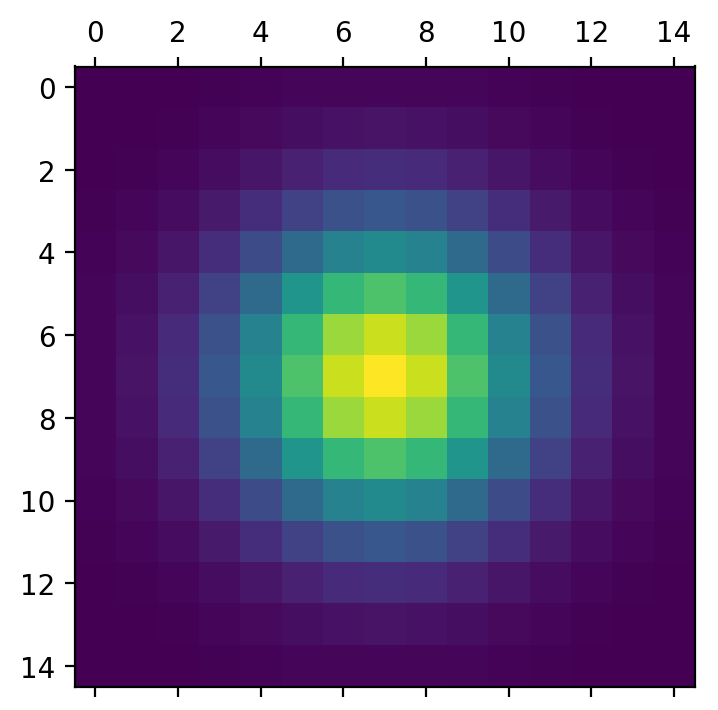

In [111]:
gaussian_2d = gaussian_filter * gaussian_filter[:, np.newaxis]
plt.matshow(gaussian_2d)

In [107]:
out = convolve(image, gaussian_2d[:, :, np.newaxis])

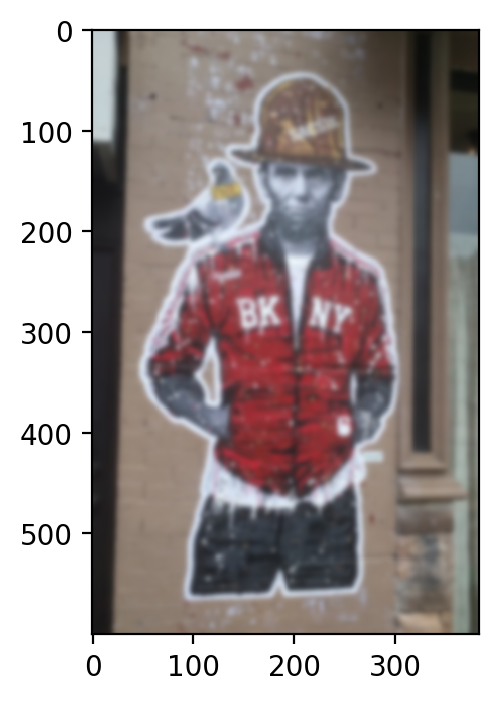

In [112]:
plt.imshow(out)

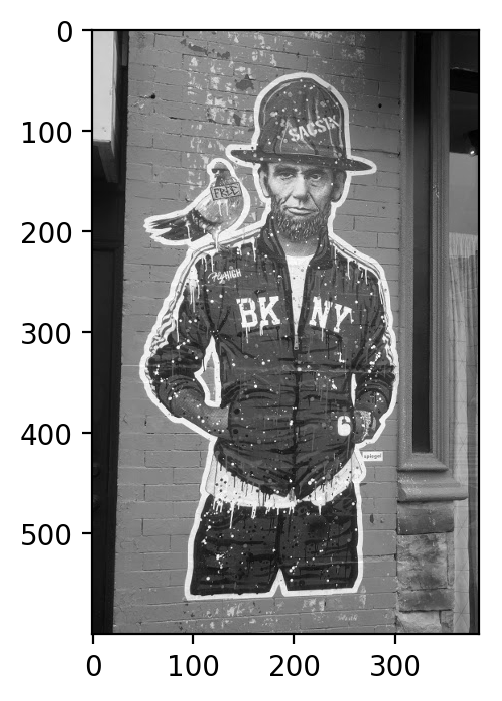

In [118]:
gray_image = image.mean(axis=2)
plt.imshow(gray_image, cmap="gray")

In [125]:
gradient_2d = convolve(gaussian_2d, [[-1, 1]])

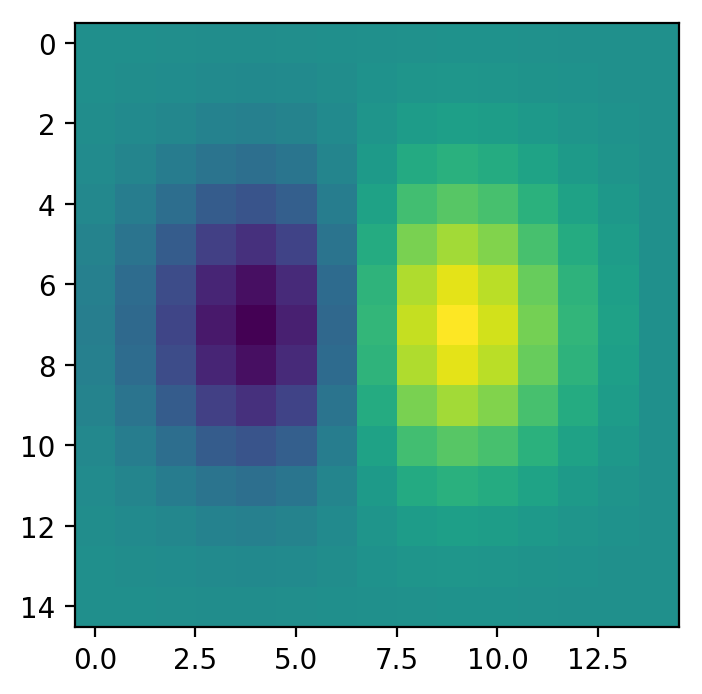

In [126]:
plt.imshow(gradient_2d)

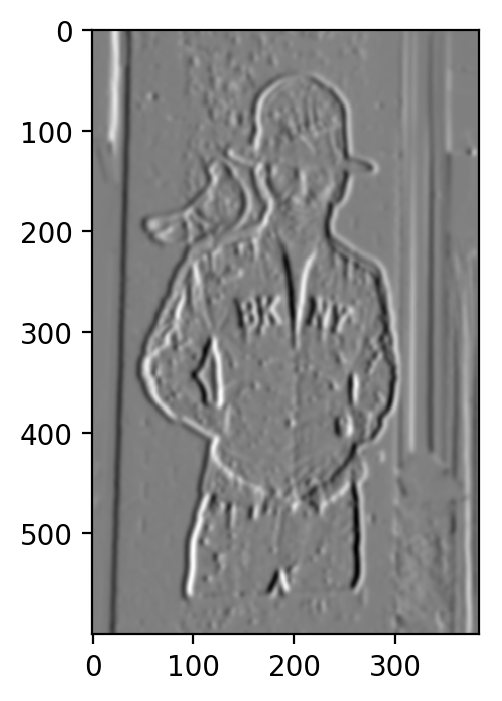

In [127]:
edges = convolve(gray_image, gradient_2d)
plt.imshow(edges, cmap="gray")

# CNN

In [174]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


X_train_images = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
X_test_images = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [175]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

num_classes = 10
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

In [177]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_163 (Dense)            (None, 64)                51264     
_________________________________________________________________
dense_164 (Dense)            (None, 10)                650       
Total para

In [176]:
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn = cnn.fit(X_train_images, y_train,
                      batch_size=128, epochs=20, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 43s - loss: 9.0900 - acc: 0.4085 - val_loss: 0.2359 - val_acc: 0.9280
Epoch 2/20
54000/54000 [==============================] - 46s - loss: 0.1478 - acc: 0.9561 - val_loss: 0.0864 - val_acc: 0.9762
Epoch 3/20
54000/54000 [==============================] - 48s - loss: 0.0696 - acc: 0.9785 - val_loss: 0.0688 - val_acc: 0.9795
Epoch 4/20
54000/54000 [==============================] - 40s - loss: 0.0459 - acc: 0.9849 - val_loss: 0.0577 - val_acc: 0.9838
Epoch 5/20
54000/54000 [==============================] - 41s - loss: 0.0338 - acc: 0.9892 - val_loss: 0.0613 - val_acc: 0.9847
Epoch 6/20
54000/54000 [==============================] - 48s - loss: 0.0277 - acc: 0.9910 - val_loss: 0.0590 - val_acc: 0.9853
Epoch 7/20
54000/54000 [==============================] - 48s - loss: 0.0209 - acc: 0.9931 - val_loss: 0.0533 - val_acc: 0.9865
Epoch 8/20
54000/54000 [==============================]

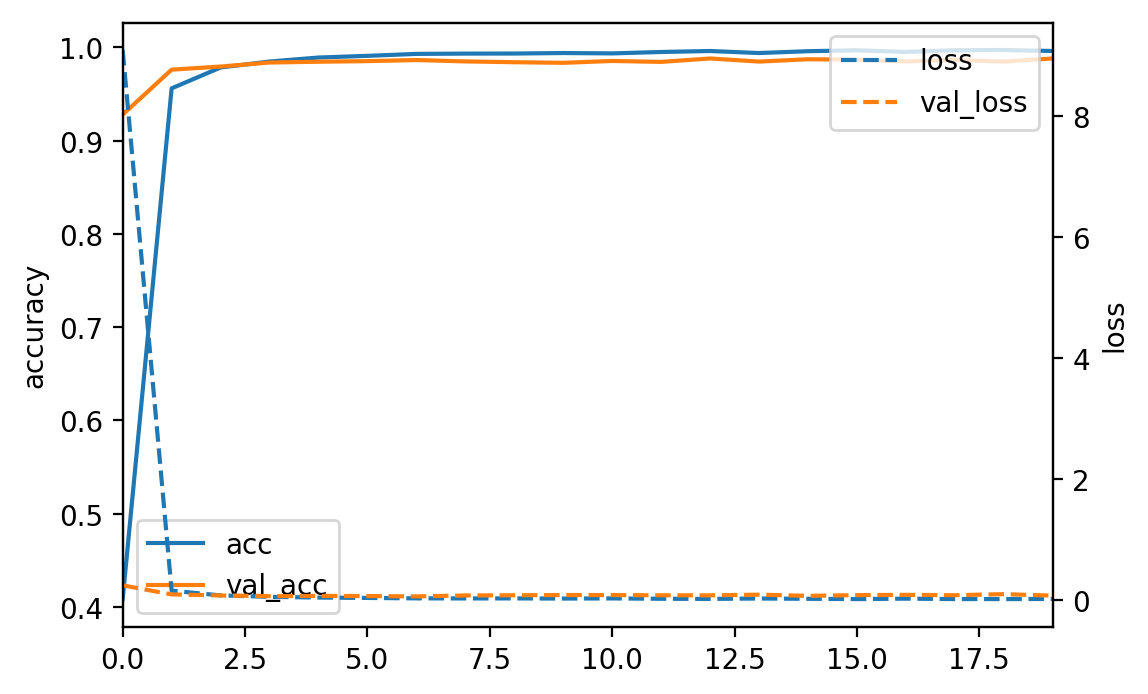

In [188]:
plot_history(history_cnn)

In [200]:
cnn.evaluate(X_test_images, y_test)

 9952/10000 [============================>.] - ETA: 0s

[0.089020583277629253, 0.98429999999999995]

(0.9, 1)

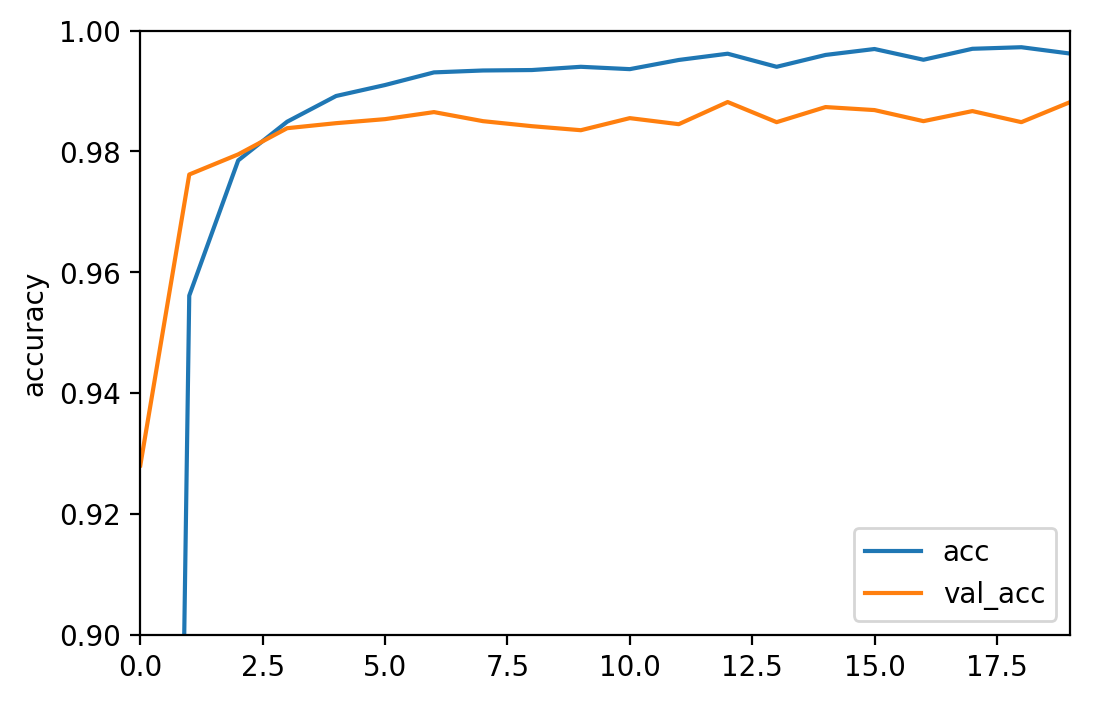

In [202]:
df = pd.DataFrame(history_cnn.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
plt.ylim(.9, 1)

In [205]:
layer1 = cnn.layers[0]

In [214]:
weights, biases = layer1.get_weights()

In [215]:
weights.shape

(3, 3, 1, 32)

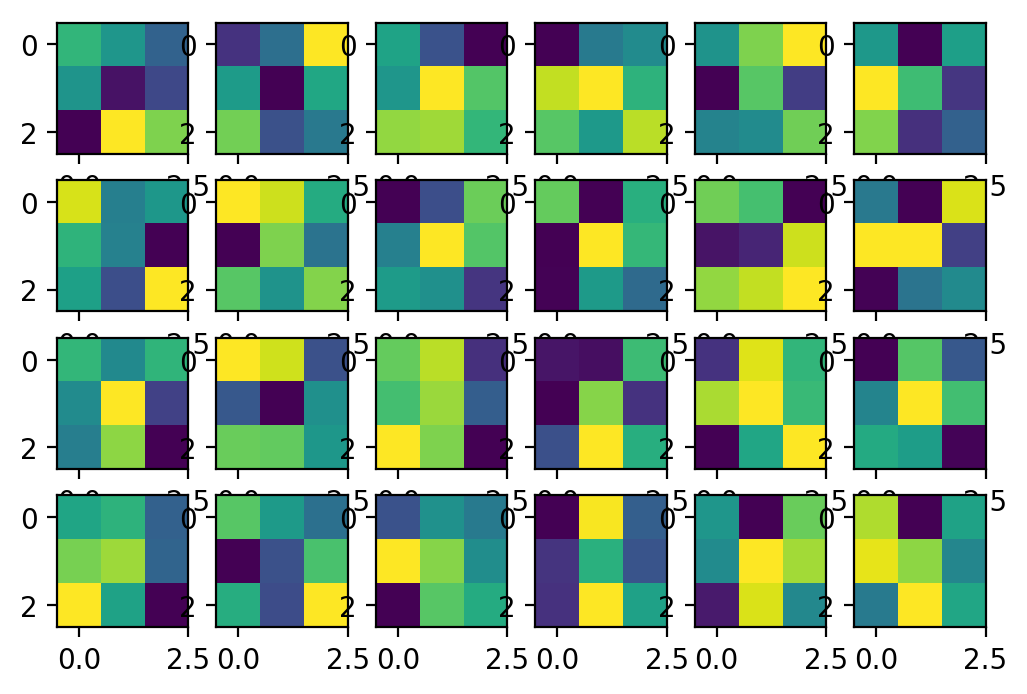

In [217]:
fig, axes = plt.subplots(4, 6)
for ax, weight in zip(axes.ravel(), weights.T):
    ax.imshow(weight[0, :, :])

In [218]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

num_classes = 10
cnn = Sequential()
cnn.add(Conv2D(8, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(8, (5, 5), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

In [232]:
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn = cnn.fit(X_train_images, y_train,
                      batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 20s - loss: 0.0957 - acc: 0.9709 - val_loss: 0.0983 - val_acc: 0.9740
Epoch 2/10
54000/54000 [==============================] - 17s - loss: 0.0730 - acc: 0.9778 - val_loss: 0.0829 - val_acc: 0.9787
Epoch 3/10
54000/54000 [==============================] - 21s - loss: 0.0577 - acc: 0.9828 - val_loss: 0.0738 - val_acc: 0.9807
Epoch 4/10
54000/54000 [==============================] - 25s - loss: 0.0506 - acc: 0.9839 - val_loss: 0.0789 - val_acc: 0.9800
Epoch 5/10
54000/54000 [==============================] - 18s - loss: 0.0430 - acc: 0.9865 - val_loss: 0.0673 - val_acc: 0.9837
Epoch 6/10
54000/54000 [==============================] - 20s - loss: 0.0370 - acc: 0.9880 - val_loss: 0.0752 - val_acc: 0.9823
Epoch 7/10
54000/54000 [==============================] - 17s - loss: 0.0354 - acc: 0.9889 - val_loss: 0.0686 - val_acc: 0.9827
Epoch 8/10
54000/54000 [==============================]

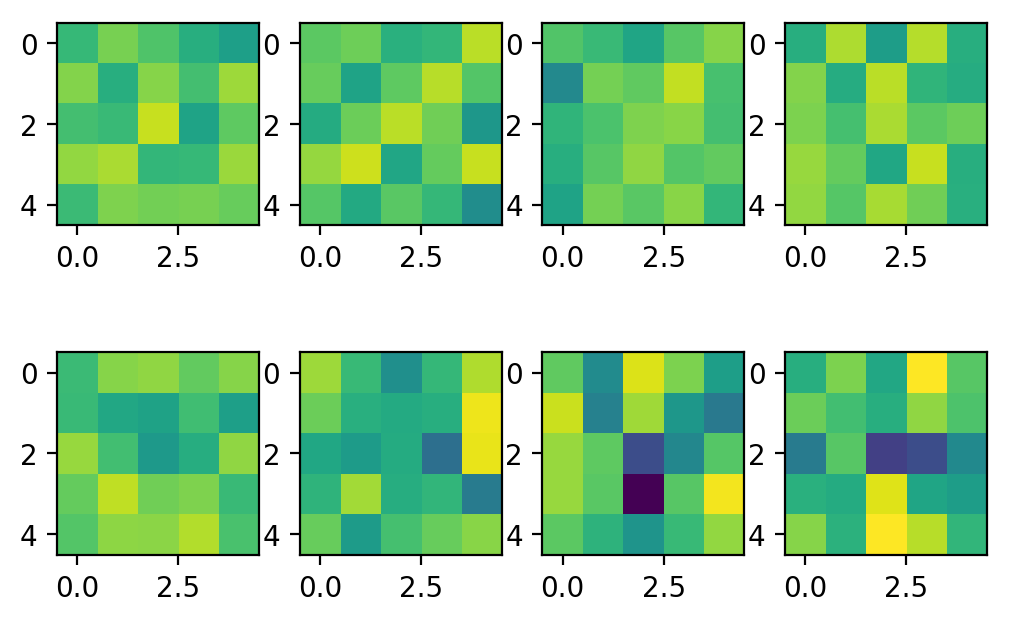

In [233]:
weights, biases = cnn.layers[0].get_weights()
fig, axes = plt.subplots(2, 4)
mi, ma = weights.min(), weights.max()
for ax, weight in zip(axes.ravel(), weights.T):
    ax.imshow(weight[0, :, :].T, vmin=mi, vmax=ma)

In [223]:
weights.shape

(5, 5, 1, 8)

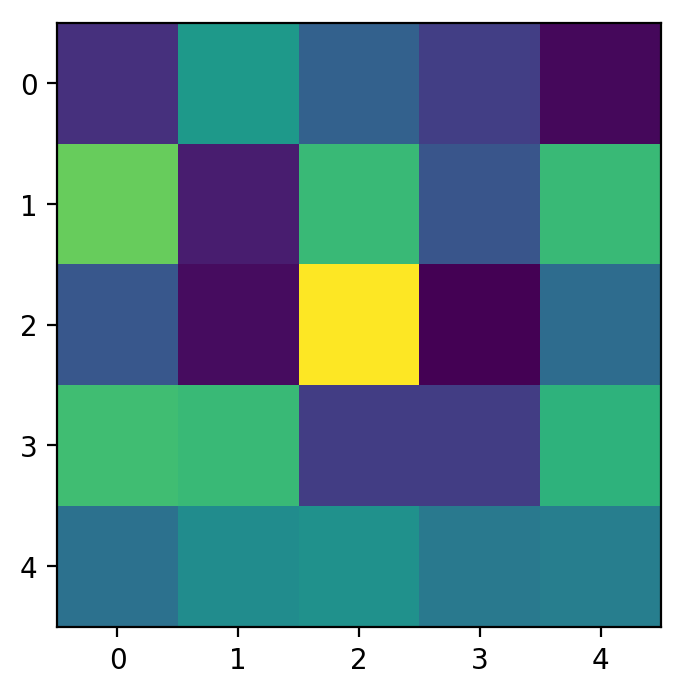

In [226]:
plt.imshow(weights[:, :, 0, 0])

In [236]:
asdf = cnn.get_input_at(0)

In [262]:
from keras import backend as K

# with a Sequential model
get_1rd_layer_output = K.function([cnn.layers[0].input],
                                  [cnn.layers[0].output])
get_3rd_layer_output = K.function([cnn.layers[0].input],
                                  [cnn.layers[3].output])

layer1_output = get_1rd_layer_output([X_train_images[:5]])[0]
layer3_output = get_3rd_layer_output([X_train_images[:5]])[0]

In [263]:
layer1_output.shape

(5, 24, 24, 8)

In [264]:
layer3_output.shape

(5, 4, 4, 8)

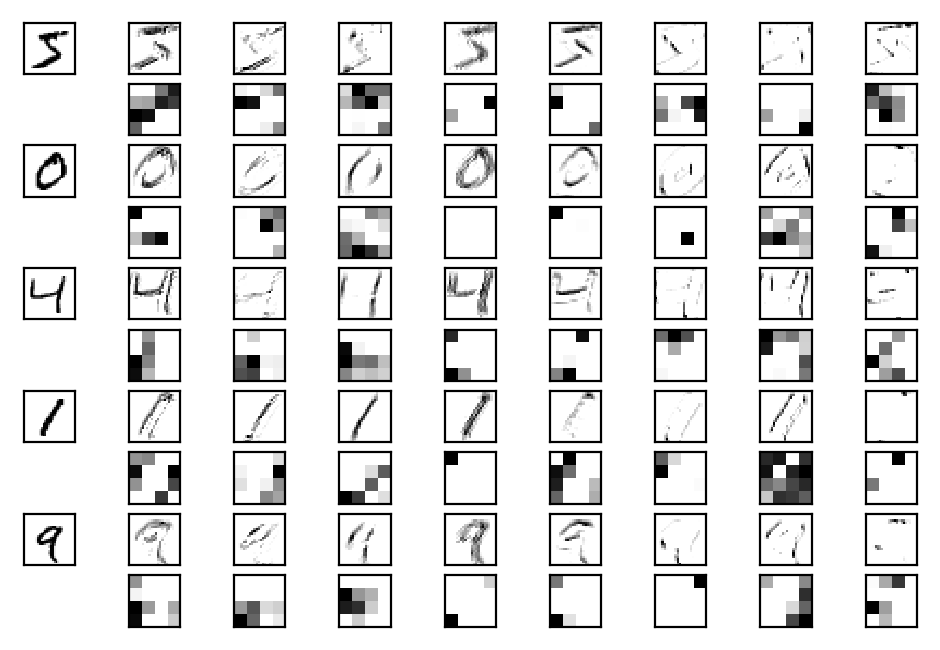

In [267]:
weights, biases = cnn.layers[0].get_weights()
n_images = layer1_output.shape[0]
n_filters = layer1_output.shape[3]
fig, axes = plt.subplots(n_images * 2, n_filters + 1, subplot_kw={'xticks': (), 'yticks': ()})
for i in range(layer1_output.shape[0]):
    # for reach input image (= 2 rows)
    axes[2 * i, 0].imshow(X_train_images[i, :, :, 0], cmap="gray_r")
    axes[2 * i + 1, 0].set_visible(False)
    for j in range(layer1_output.shape[3]):
        # for each feature map (same number in layer 1 and 3)
        axes[2 * i, j + 1].imshow(layer1_output[i, :, :, j], cmap='gray_r')
        axes[2 * i + 1, j + 1].imshow(layer3_output[i, :, :, j], cmap='gray_r')


In [268]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

num_classes = 10
cnn_small = Sequential()
cnn_small.add(Conv2D(8, kernel_size=(3, 3),
              activation='relu',
              input_shape=input_shape))
cnn_small.add(MaxPooling2D(pool_size=(2, 2)))
cnn_small.add(Conv2D(8, (3, 3), activation='relu'))
cnn_small.add(MaxPooling2D(pool_size=(2, 2)))
cnn_small.add(Flatten())
cnn_small.add(Dense(64, activation='relu'))
cnn_small.add(Dense(num_classes, activation='softmax'))

In [286]:
cnn_small.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 8)         584       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_172 (Dense)            (None, 64)                12864     
_________________________________________________________________
dense_173 (Dense)            (None, 10)                650       
Total para

In [270]:
cnn_small.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn_small = cnn_small.fit(X_train_images, y_train,
                      batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 14s - loss: 10.2084 - acc: 0.3541 - val_loss: 9.7689 - val_acc: 0.3890
Epoch 2/10
54000/54000 [==============================] - 12s - loss: 9.2619 - acc: 0.4173 - val_loss: 8.0330 - val_acc: 0.4945
Epoch 3/10
54000/54000 [==============================] - 14s - loss: 4.1655 - acc: 0.6926 - val_loss: 0.1983 - val_acc: 0.9410
Epoch 4/10
54000/54000 [==============================] - 17s - loss: 0.1664 - acc: 0.9517 - val_loss: 0.1306 - val_acc: 0.9668
Epoch 5/10
54000/54000 [==============================] - 14s - loss: 0.1019 - acc: 0.9693 - val_loss: 0.1055 - val_acc: 0.9742
Epoch 6/10
54000/54000 [==============================] - 13s - loss: 0.0764 - acc: 0.9764 - val_loss: 0.0896 - val_acc: 0.9753
Epoch 7/10
54000/54000 [==============================] - 13s - loss: 0.0598 - acc: 0.9811 - val_loss: 0.0793 - val_acc: 0.9787
Epoch 8/10
54000/54000 [==============================

In [290]:
weights, biases = cnn_small.layers[0].get_weights()
weights2, biases2 = cnn_small.layers[2].get_weights()
print(weights.shape)
print(weights2.shape)

(3, 3, 1, 8)
(3, 3, 8, 8)


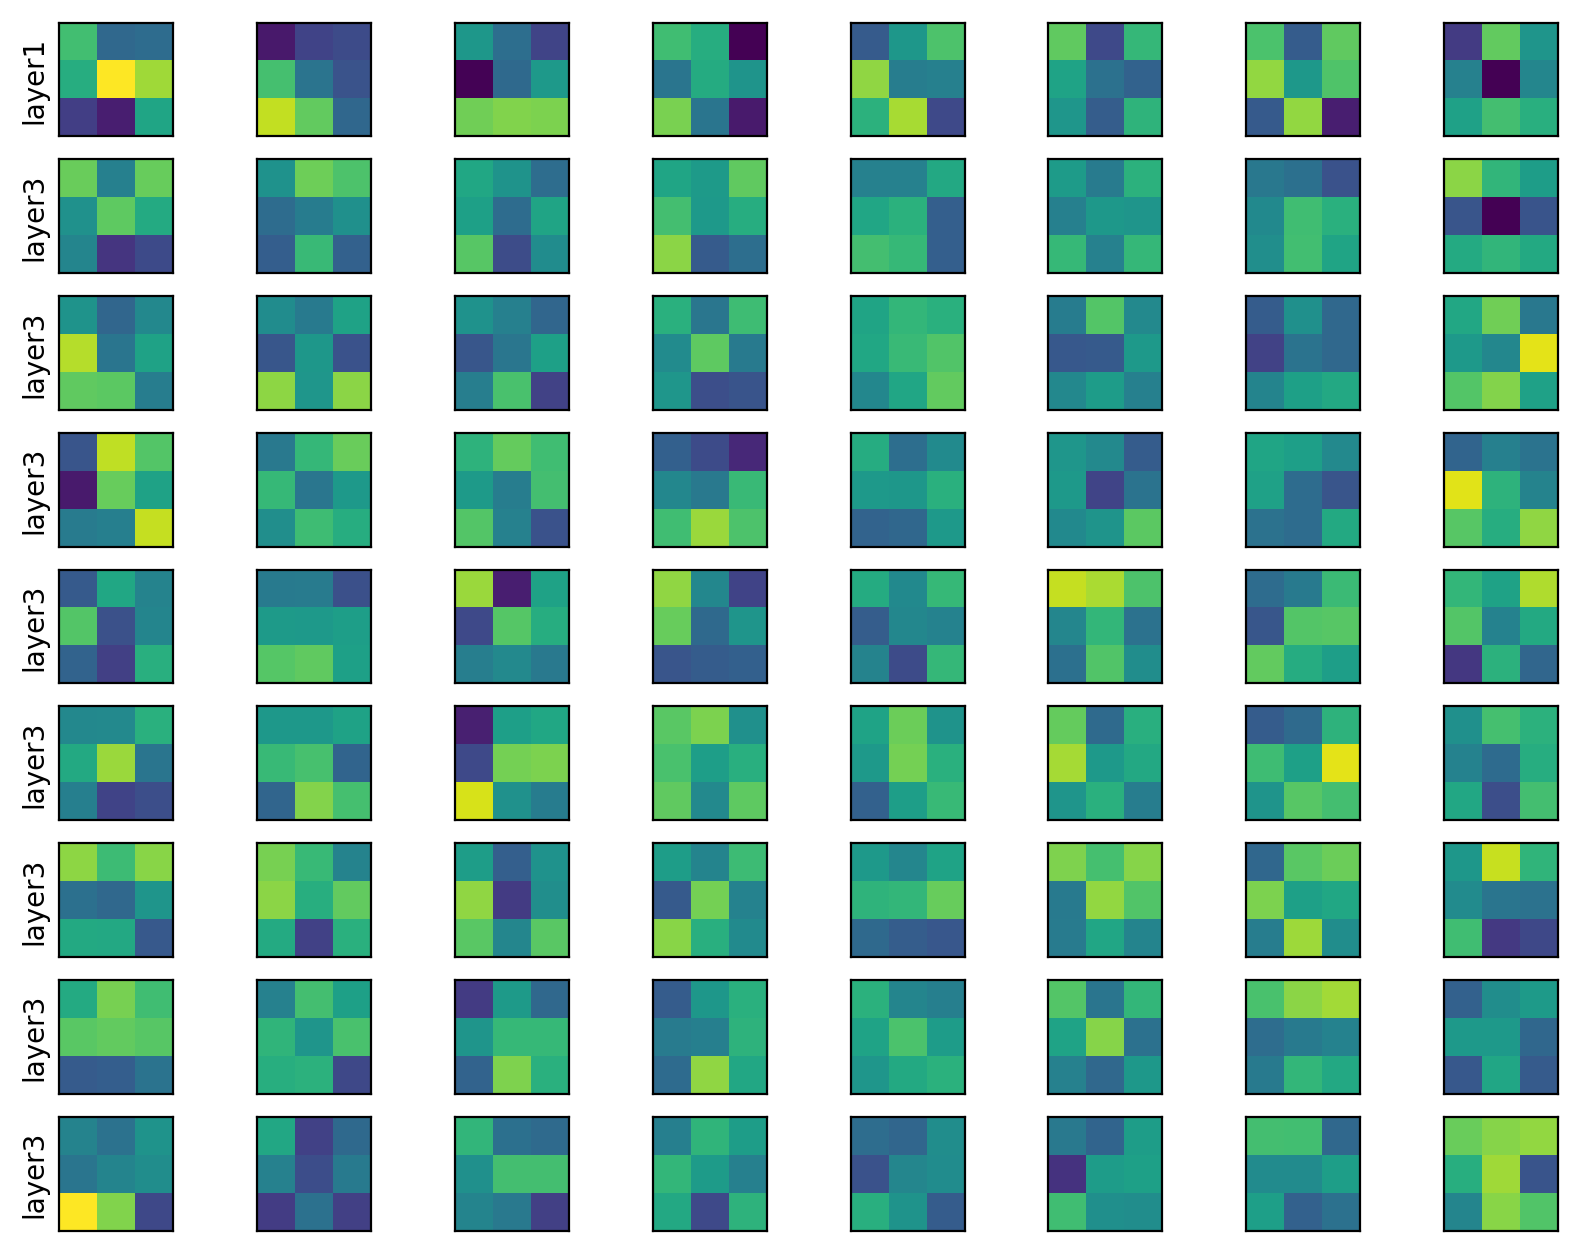

In [296]:
fig, axes = plt.subplots(9, 8, figsize=(10, 8), subplot_kw={'xticks': (), 'yticks': ()})
mi, ma = weights.min(), weights.max()
for ax, weight in zip(axes[0], weights.T):
    ax.imshow(weight[0, :, :].T, vmin=mi, vmax=ma)
axes[0, 0].set_ylabel("layer1")
mi, ma = weights2.min(), weights2.max()
for i in range(1, 9):
    axes[i, 0].set_ylabel("layer3")
for ax, weight in zip(axes[1:].ravel(), weights2.reshape(3, 3, -1).T):
    ax.imshow(weight[:, :].T, vmin=mi, vmax=ma)

In [281]:
from keras import backend as K

get_1rd_layer_output = K.function([cnn_small.layers[0].input],
                                  [cnn_small.layers[0].output])
get_3rd_layer_output = K.function([cnn_small.layers[0].input],
                                  [cnn_small.layers[2].output])

layer1_output = get_1rd_layer_output([X_train_images[:5]])[0]
layer3_output = get_3rd_layer_output([X_train_images[:5]])[0]

In [282]:
layer1_output.shape

(5, 26, 26, 8)

In [283]:
layer3_output.shape

(5, 11, 11, 8)

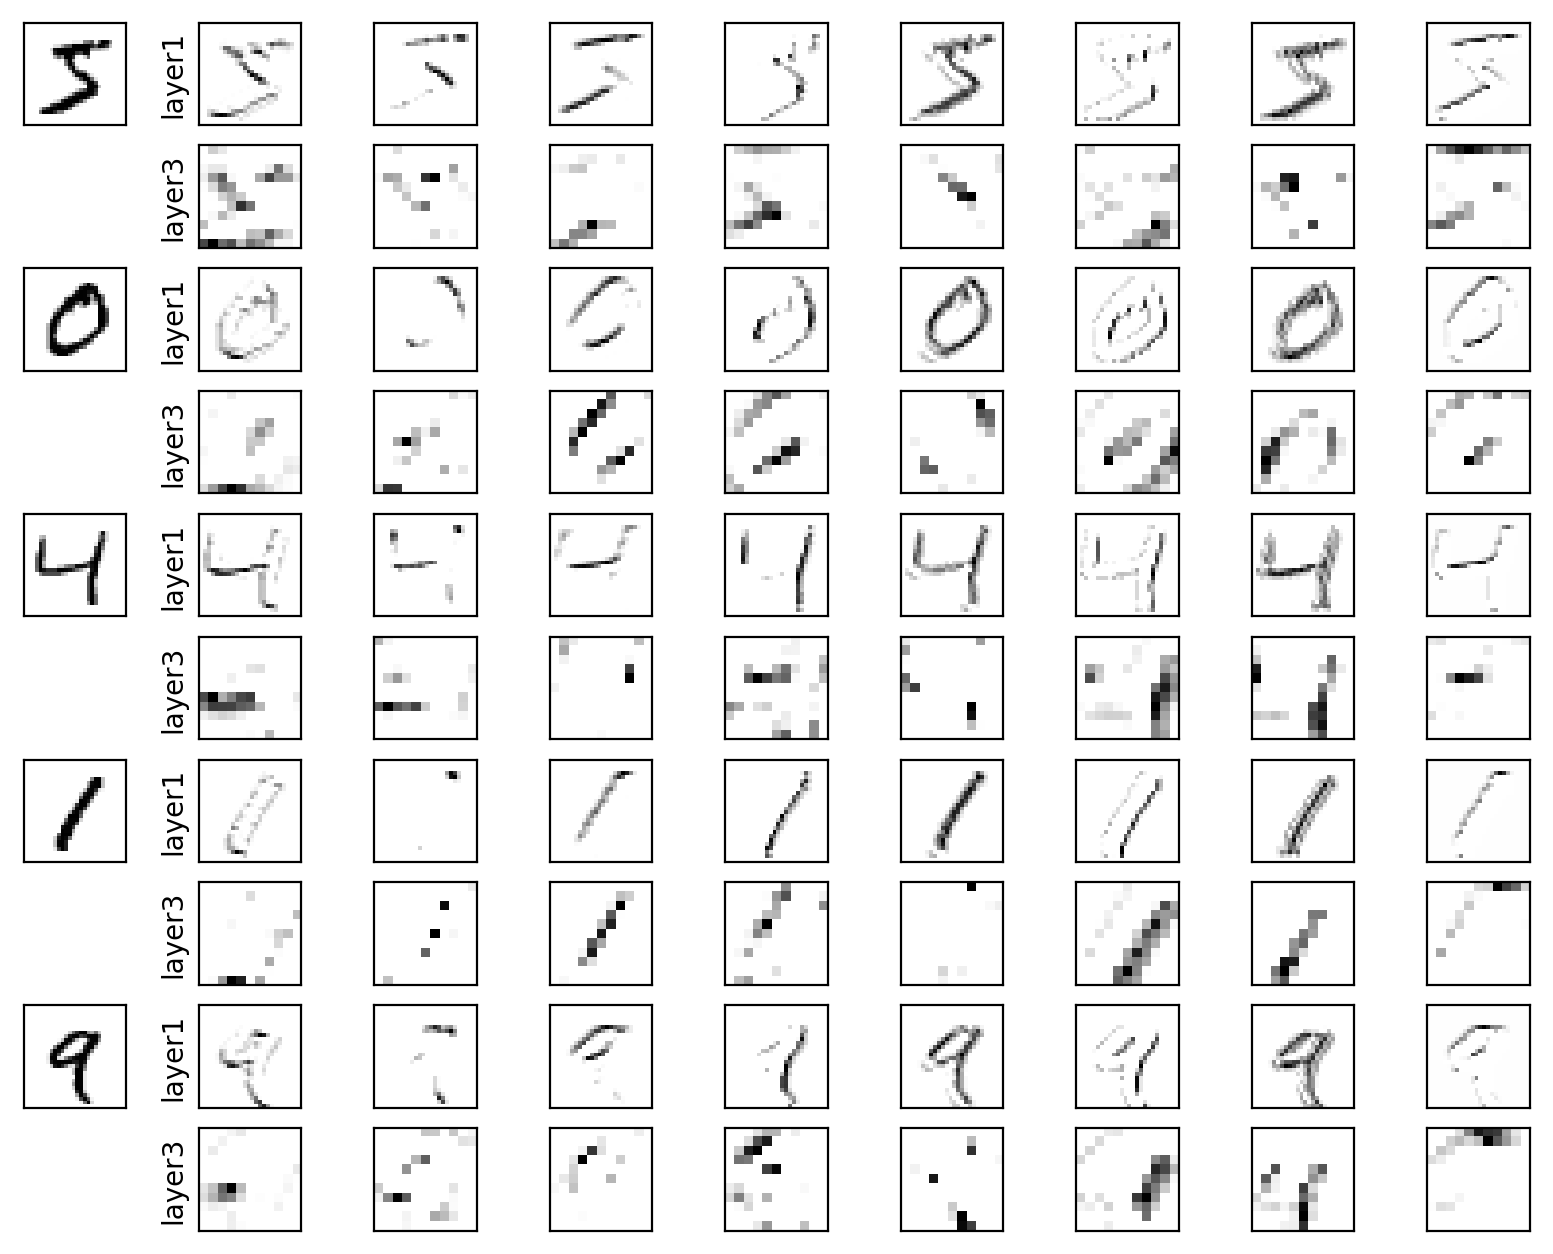

In [284]:
weights, biases = cnn.layers[0].get_weights()
n_images = layer1_output.shape[0]
n_filters = layer1_output.shape[3]
fig, axes = plt.subplots(n_images * 2, n_filters + 1, figsize=(10, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i in range(layer1_output.shape[0]):
    # for reach input image (= 2 rows)
    axes[2 * i, 0].imshow(X_train_images[i, :, :, 0], cmap="gray_r")
    axes[2 * i + 1, 0].set_visible(False)
    axes[2 * i, 1].set_ylabel("layer1")
    axes[2 * i + 1, 1].set_ylabel("layer3")
    for j in range(layer1_output.shape[3]):
        # for each feature map (same number in layer 1 and 3)
        axes[2 * i, j + 1].imshow(layer1_output[i, :, :, j], cmap='gray_r')
        axes[2 * i + 1, j + 1].imshow(layer3_output[i, :, :, j], cmap='gray_r')


# Batch Normalization

In [346]:
from keras.layers import BatchNormalization

num_classes = 10
cnn_small_bn = Sequential()
cnn_small_bn.add(Conv2D(8, kernel_size=(3, 3),
                 input_shape=input_shape))
cnn_small_bn.add(Activation("relu"))
cnn_small_bn.add(BatchNormalization())
cnn_small_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_small_bn.add(Conv2D(8, (3, 3)))
cnn_small_bn.add(Activation("relu"))
cnn_small_bn.add(BatchNormalization())
cnn_small_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_small_bn.add(Flatten())
cnn_small_bn.add(Dense(64, activation='relu'))
cnn_small_bn.add(Dense(num_classes, activation='softmax'))

In [347]:
cnn_small_bn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn_small_bn = cnn_small_bn.fit(X_train_images, y_train,
                                        batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 33s - loss: 0.3454 - acc: 0.8952 - val_loss: 0.0893 - val_acc: 0.9732
Epoch 2/10
54000/54000 [==============================] - 35s - loss: 0.0824 - acc: 0.9750 - val_loss: 0.0664 - val_acc: 0.9807
Epoch 3/10
54000/54000 [==============================] - 34s - loss: 0.0575 - acc: 0.9830 - val_loss: 0.0549 - val_acc: 0.9835
Epoch 4/10
54000/54000 [==============================] - 31s - loss: 0.0454 - acc: 0.9859 - val_loss: 0.0508 - val_acc: 0.9850
Epoch 5/10
54000/54000 [==============================] - 29s - loss: 0.0372 - acc: 0.9885 - val_loss: 0.0477 - val_acc: 0.9855
Epoch 6/10
54000/54000 [==============================] - 30s - loss: 0.0313 - acc: 0.9903 - val_loss: 0.0532 - val_acc: 0.9843
Epoch 7/10
54000/54000 [==============================] - 32s - loss: 0.0278 - acc: 0.9915 - val_loss: 0.0482 - val_acc: 0.9857
Epoch 8/10
54000/54000 [==============================]

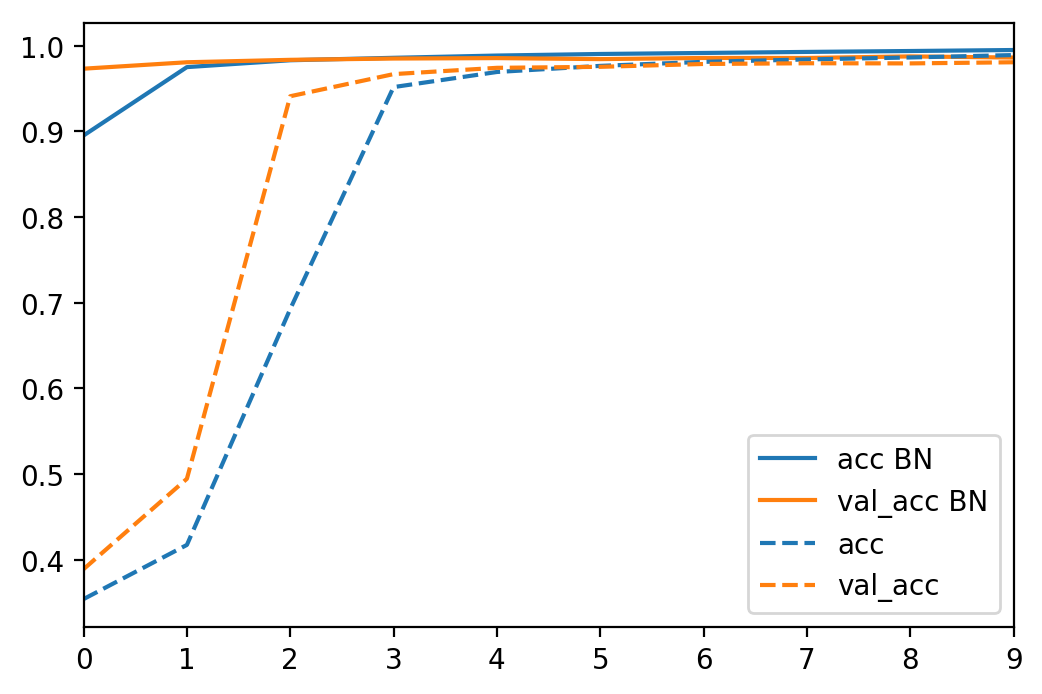

In [362]:
hist_small_bn = pd.DataFrame(history_cnn_small_bn.history)
hist_small = pd.DataFrame(history_cnn_small.history)
hist_small_bn.rename(columns=lambda x: x + " BN", inplace=True)
hist_small_bn[['acc BN', 'val_acc BN']].plot()
hist_small[['acc', 'val_acc']].plot(ax=plt.gca(), linestyle='--', color=[plt.cm.Vega10(0), plt.cm.Vega10(1)])

In [366]:
from keras.layers import BatchNormalization

num_classes = 10
cnn32 = Sequential()
cnn32.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=input_shape))
cnn32.add(Activation("relu"))
#cnn_small_bn.add(BatchNormalization())
cnn32.add(MaxPooling2D(pool_size=(2, 2)))
cnn32.add(Conv2D(32, (3, 3)))
cnn32.add(Activation("relu"))
#cnn_small_bn.add(BatchNormalization())
cnn32.add(MaxPooling2D(pool_size=(2, 2)))
cnn32.add(Flatten())
cnn32.add(Dense(64, activation='relu'))
cnn32.add(Dense(num_classes, activation='softmax'))

In [367]:
cnn32.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn_32 = cnn32.fit(X_train_images, y_train,
                            batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 47s - loss: 10.2722 - acc: 0.3468 - val_loss: 0.3261 - val_acc: 0.9062
Epoch 2/10
54000/54000 [==============================] - 41s - loss: 0.1391 - acc: 0.9581 - val_loss: 0.0725 - val_acc: 0.9782
Epoch 3/10
54000/54000 [==============================] - 42s - loss: 0.0638 - acc: 0.9800 - val_loss: 0.0616 - val_acc: 0.9828
Epoch 4/10
54000/54000 [==============================] - 41s - loss: 0.0442 - acc: 0.9857 - val_loss: 0.0635 - val_acc: 0.9812
Epoch 5/10
54000/54000 [==============================] - 41s - loss: 0.0333 - acc: 0.9897 - val_loss: 0.0624 - val_acc: 0.9855
Epoch 6/10
54000/54000 [==============================] - 40s - loss: 0.0266 - acc: 0.9913 - val_loss: 0.0517 - val_acc: 0.9853
Epoch 7/10
54000/54000 [==============================] - 41s - loss: 0.0211 - acc: 0.9928 - val_loss: 0.0628 - val_acc: 0.9837
Epoch 8/10
54000/54000 [==============================

In [368]:
from keras.layers import BatchNormalization

num_classes = 10
cnn32_bn = Sequential()
cnn32_bn.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=input_shape))
cnn32_bn.add(Activation("relu"))
cnn32_bn.add(BatchNormalization())
cnn32_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn32_bn.add(Conv2D(32, (3, 3)))
cnn32_bn.add(Activation("relu"))
cnn32_bn.add(BatchNormalization())
cnn32_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn32_bn.add(Flatten())
cnn32_bn.add(Dense(64, activation='relu'))
cnn32_bn.add(Dense(num_classes, activation='softmax'))

In [369]:
cnn32_bn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn_32_bn = cnn32_bn.fit(X_train_images, y_train,
                                 batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 127s - loss: 0.1497 - acc: 0.9544 - val_loss: 0.0477 - val_acc: 0.9852
Epoch 2/10
54000/54000 [==============================] - 117s - loss: 0.0413 - acc: 0.9872 - val_loss: 0.0472 - val_acc: 0.9862
Epoch 3/10
54000/54000 [==============================] - 124s - loss: 0.0273 - acc: 0.9915 - val_loss: 0.0450 - val_acc: 0.9870
Epoch 4/10
54000/54000 [==============================] - 137s - loss: 0.0214 - acc: 0.9931 - val_loss: 0.0406 - val_acc: 0.9883
Epoch 5/10
54000/54000 [==============================] - 139s - loss: 0.0153 - acc: 0.9954 - val_loss: 0.0507 - val_acc: 0.9863
Epoch 6/10
54000/54000 [==============================] - 114s - loss: 0.0098 - acc: 0.9969 - val_loss: 0.0416 - val_acc: 0.9897
Epoch 7/10
54000/54000 [==============================] - 120s - loss: 0.0112 - acc: 0.9961 - val_loss: 0.0589 - val_acc: 0.9860
Epoch 8/10
54000/54000 [========================

(0.8, 1)

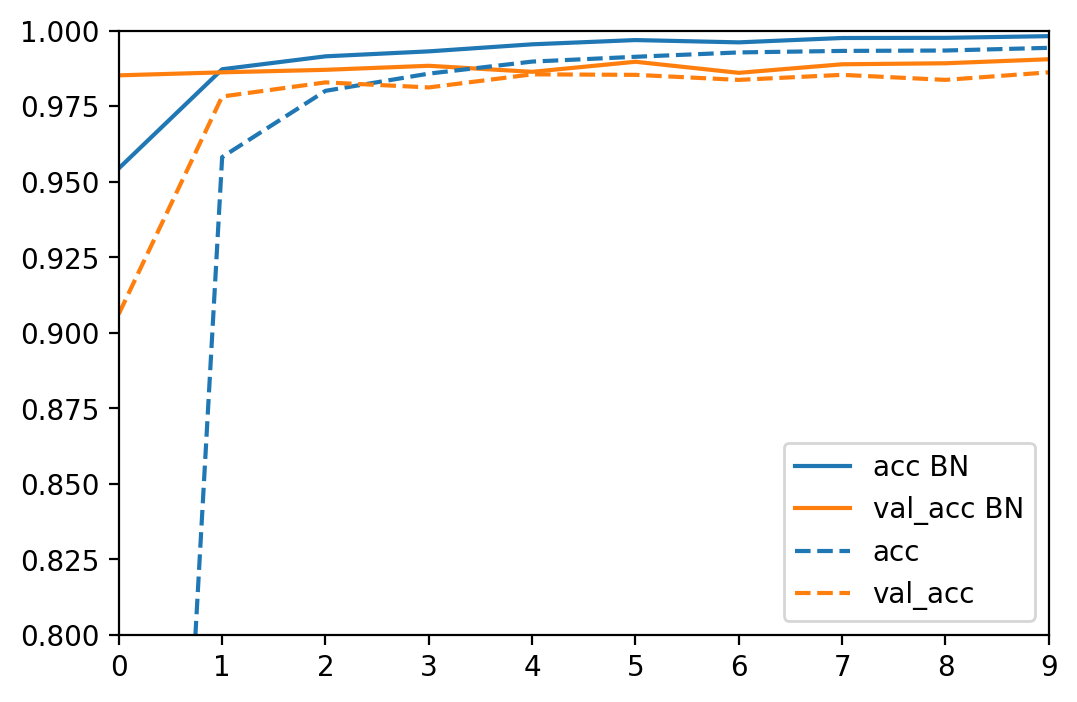

In [371]:
hist_32_bn = pd.DataFrame(history_cnn_32_bn.history)
hist_32 = pd.DataFrame(history_cnn_32.history)
hist_32_bn.rename(columns=lambda x: x + " BN", inplace=True)
hist_32_bn[['acc BN', 'val_acc BN']].plot()
hist_32[['acc', 'val_acc']].plot(ax=plt.gca(), linestyle='--', color=[plt.cm.Vega10(0), plt.cm.Vega10(1)])
plt.ylim(.8, 1)

# loading VGG

In [298]:
from keras import applications

# build the VGG16 network
model = applications.VGG16(include_top=False,
                           weights='imagenet')

In [311]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [339]:
vgg_weights, vgg_biases = model.layers[1].get_weights()
vgg_weights.shape

(3, 3, 3, 64)

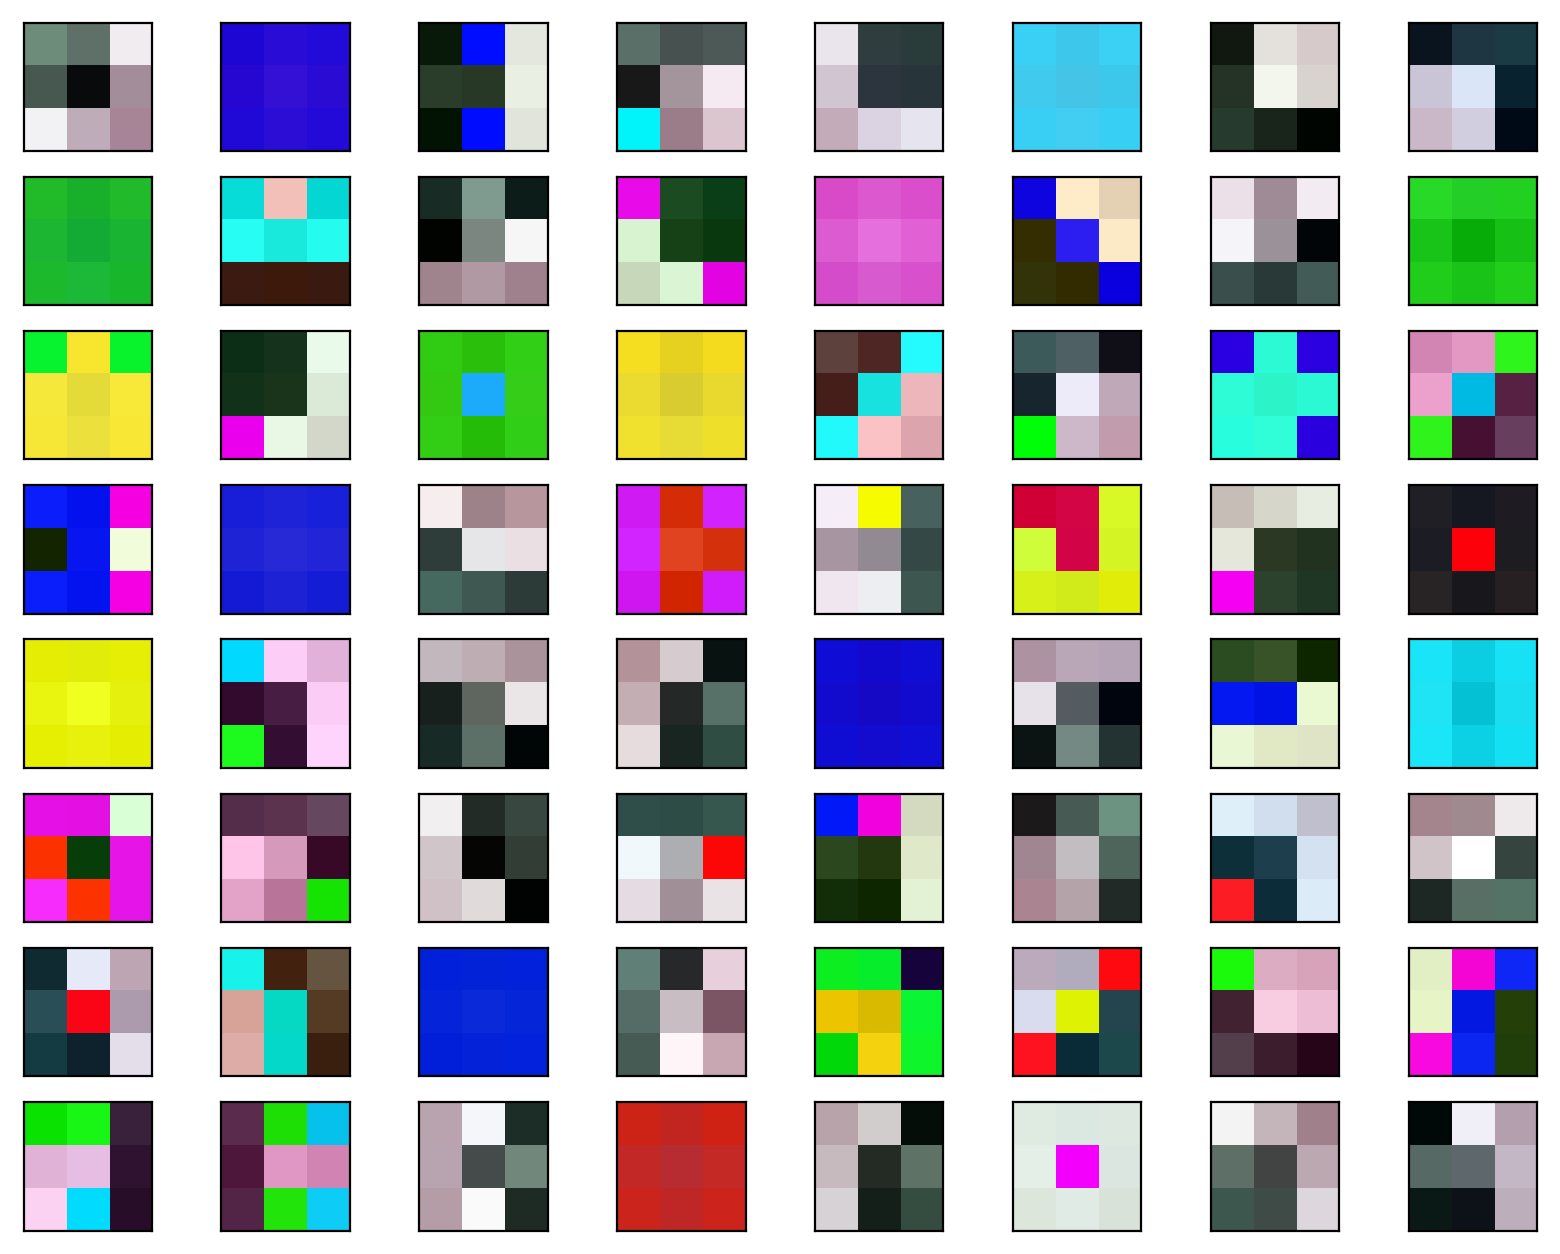

In [307]:
fig, axes = plt.subplots(8, 8, figsize=(10, 8), subplot_kw={'xticks': (), 'yticks': ()})
mi, ma = vgg_weights.min(), vgg_weights.max()
for ax, weight in zip(axes.ravel(), vgg_weights.T):
    ax.imshow(weight.T)

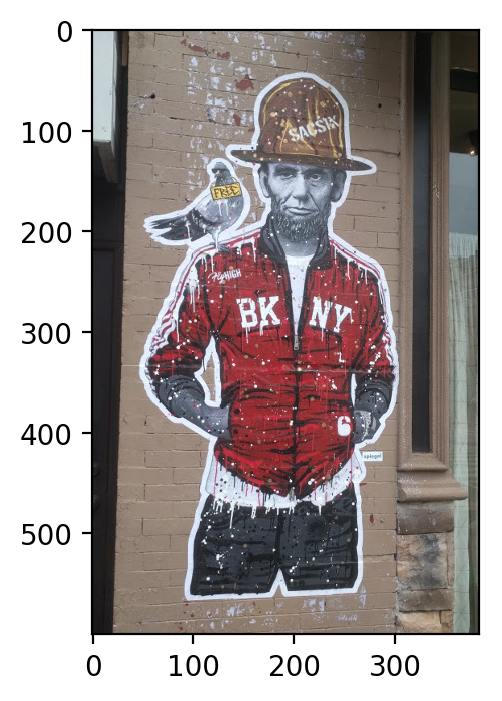

In [340]:
plt.imshow(image)

In [333]:
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[3].output])
get_6rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[6].output])

layer3_output = get_3rd_layer_output([[image]])[0]
layer6_output = get_6rd_layer_output([[image]])[0]

In [334]:
print(layer3_output.shape)
print(layer6_output.shape)

(1, 300, 192, 64)
(1, 150, 96, 128)


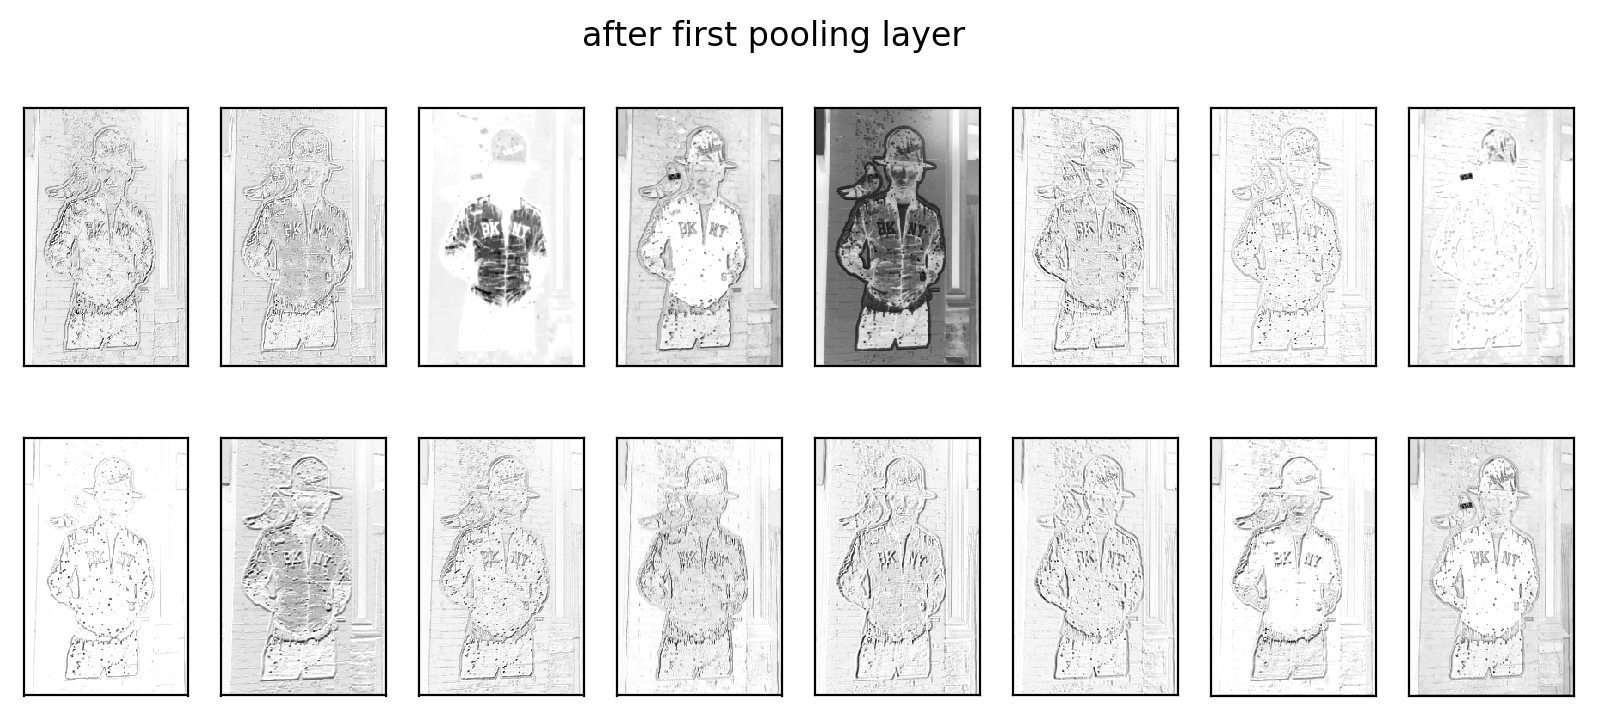

In [341]:
fig, axes = plt.subplots(2, 8, figsize=(10, 4), subplot_kw={'xticks': (), 'yticks': ()})
for ax, activation in zip(axes.ravel(), layer3_output.T):
    ax.imshow(activation[:, :, 0].T, cmap="gray_r")
plt.suptitle("after first pooling layer")

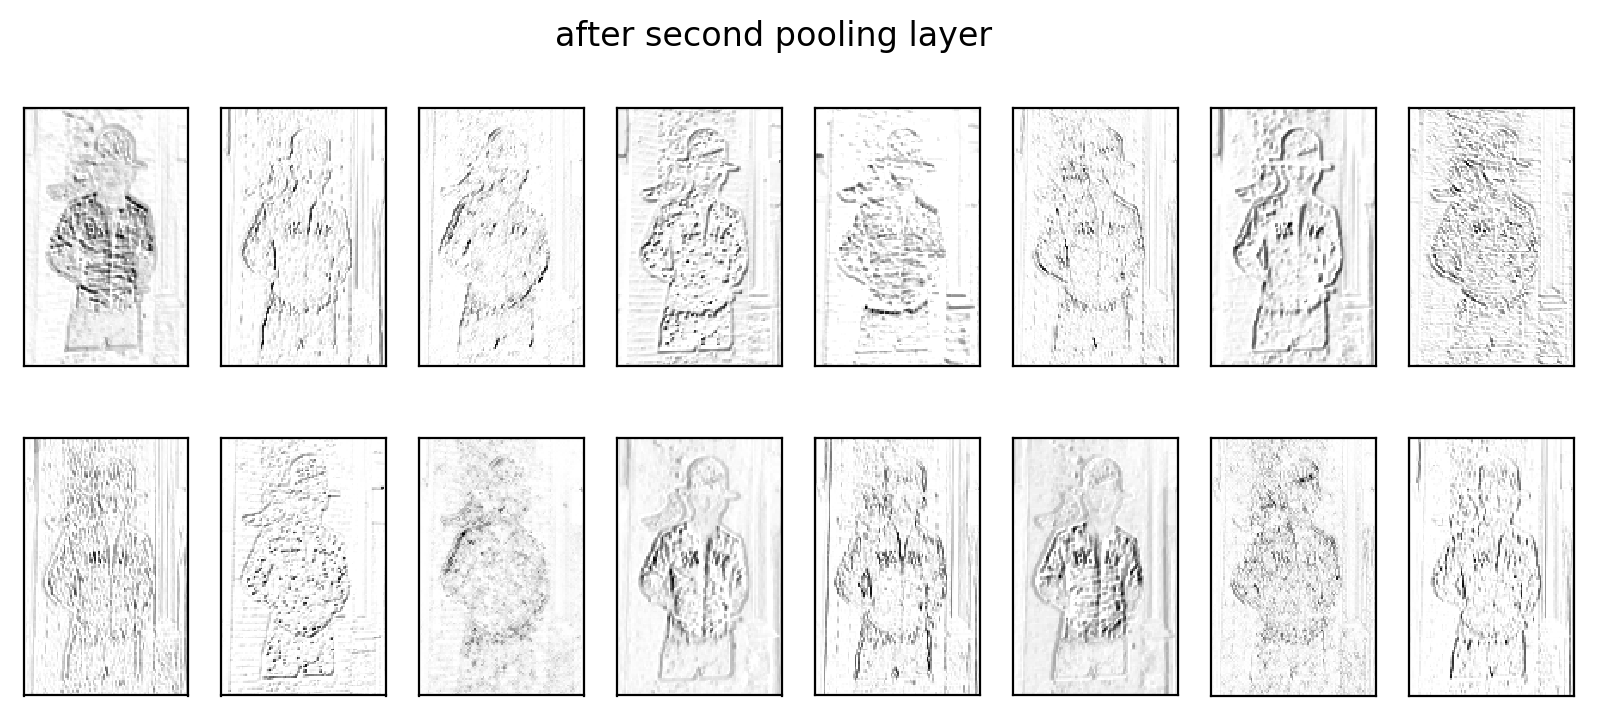

In [343]:
fig, axes = plt.subplots(2, 8, figsize=(10, 4), subplot_kw={'xticks': (), 'yticks': ()})
for ax, activation in zip(axes.ravel(), layer6_output.T):
    ax.imshow(activation[:, :, 0].T, cmap="gray_r")
plt.suptitle("after second pooling layer")


In [384]:
import flickrapi
import json


api_key = u'f770a9e7064fa7f8754b1ed8cc8cda4f'
api_secret = u' 2e750f2d723350c8 '

import flickrapi
flickr = flickrapi.FlickrAPI(api_key, api_secret, format='json')

In [455]:
json.loads(flickr.photos.licenses.getInfo().decode("utf-8"))

{'licenses': {'license': [{'id': '0',
    'name': 'All Rights Reserved',
    'url': ''},
   {'id': '4',
    'name': 'Attribution License',
    'url': 'https://creativecommons.org/licenses/by/2.0/'},
   {'id': '6',
    'name': 'Attribution-NoDerivs License',
    'url': 'https://creativecommons.org/licenses/by-nd/2.0/'},
   {'id': '3',
    'name': 'Attribution-NonCommercial-NoDerivs License',
    'url': 'https://creativecommons.org/licenses/by-nc-nd/2.0/'},
   {'id': '2',
    'name': 'Attribution-NonCommercial License',
    'url': 'https://creativecommons.org/licenses/by-nc/2.0/'},
   {'id': '1',
    'name': 'Attribution-NonCommercial-ShareAlike License',
    'url': 'https://creativecommons.org/licenses/by-nc-sa/2.0/'},
   {'id': '5',
    'name': 'Attribution-ShareAlike License',
    'url': 'https://creativecommons.org/licenses/by-sa/2.0/'},
   {'id': '7',
    'name': 'No known copyright restrictions',
    'url': 'https://www.flickr.com/commons/usage/'},
   {'id': '8',
    'name': 'Unite

In [410]:
def get_url(photo_id="33510015330"):
    response = flickr.photos.getsizes(photo_id=photo_id)
    sizes = json.loads(response.decode('utf-8'))['sizes']['size']
    for size in sizes:
        if size['label'] == "Small":
            return size['source']
            
get_url()

'https://farm4.staticflickr.com/3803/33510015330_d1fc801d16_m.jpg'

In [433]:
from IPython.display import HTML
HTML("<img src='https://farm4.staticflickr.com/3803/33510015330_d1fc801d16_m.jpg'>")

In [ ]:
# you can check the imagenet classes at https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

In [469]:
def search_ids(search_string="python", per_page=10):
    photos_response = flickr.photos.search(text=search_string, per_page=per_page, sort='relevance')
    photos = json.loads(photos_response.decode('utf-8'))['photos']['photo']
    ids = [photo['id'] for photo in photos]
    return ids

In [471]:
ids = search_ids("ball snake", per_page=100)
urls_ball = [get_url(photo_id=i) for i in ids]
img_string = "\n".join(["<img src='{}'>".format(url) for url in urls_ball])
HTML(img_string)

In [472]:
ids = search_ids("carpet python", per_page=100)
urls_carpet = [get_url(photo_id=i) for i in ids]
img_string = "\n".join(["<img src='{}'>".format(url) for url in urls_carpet])
HTML(img_string)

In [480]:
!mkdir -p snakes/carpet
!mkdir snakes/ball

In [481]:

from urllib.request import urlretrieve
import os
for url in urls_carpet:
    urlretrieve(url, os.path.join("snakes", "carpet", os.path.basename(url)))


In [482]:
for url in urls_ball:
    urlretrieve(url, os.path.join("snakes", "ball", os.path.basename(url)))

In [511]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
from keras.preprocessing import image

images_carpet = [image.load_img(os.path.join("snakes", "carpet", os.path.basename(url)), target_size=(224, 224))
                 for url in urls_carpet]
images_ball = [image.load_img(os.path.join("snakes", "ball", os.path.basename(url)), target_size=(224, 224))
                 for url in urls_ball]
X = np.array([image.img_to_array(img) for img in images_carpet + images_ball])

In [527]:
from keras.preprocessing import image

images_carpet = [image.load_img(os.path.join("snakes", "carpet", os.path.basename(url)), target_size=(224, 224))
                 for url in urls_carpet]
images_ball = [image.load_img(os.path.join("snakes", "ball", os.path.basename(url)), target_size=(224, 224))
                 for url in urls_ball]
X = np.array([image.img_to_array(img) for img in images_carpet + images_ball])

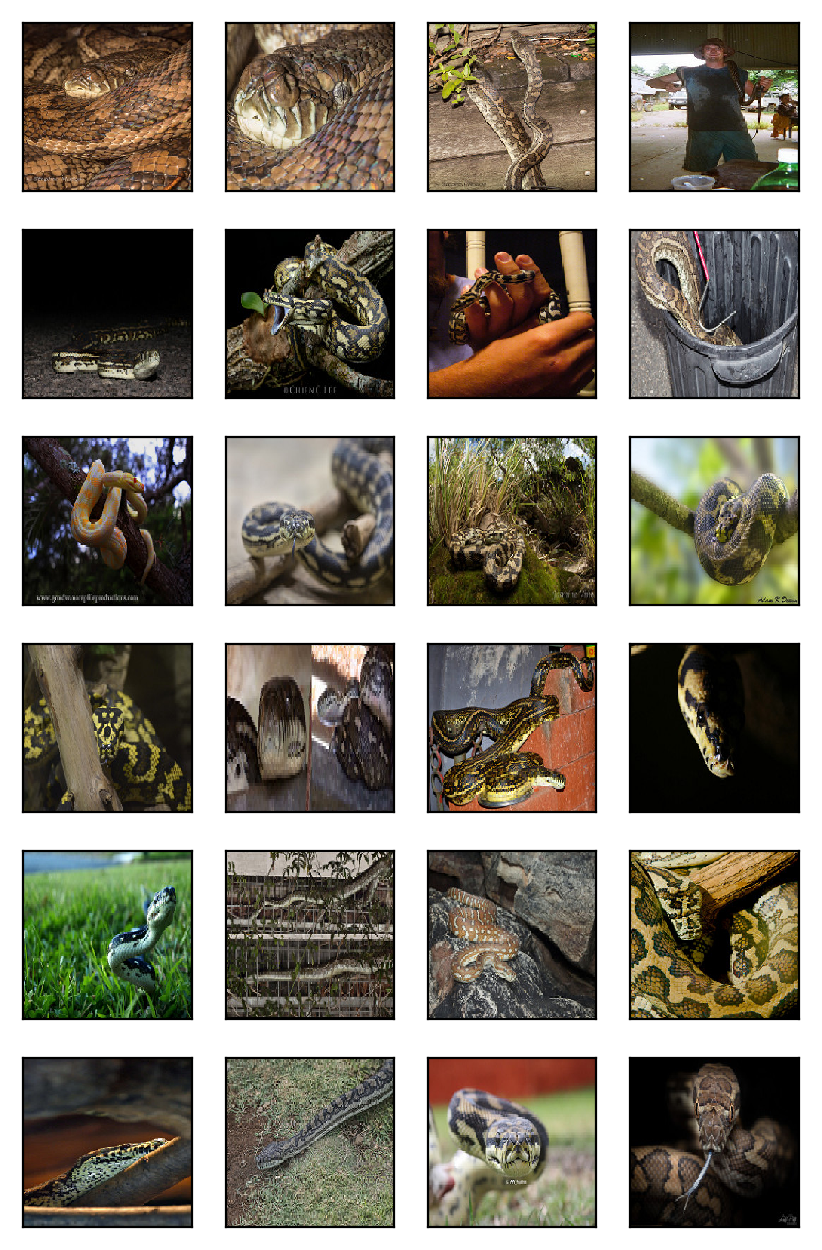

In [566]:
fig, axes = plt.subplots(6, 4, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(5, 8))
for img, ax in zip(images_carpet, axes.ravel()):
    ax.imshow(img)

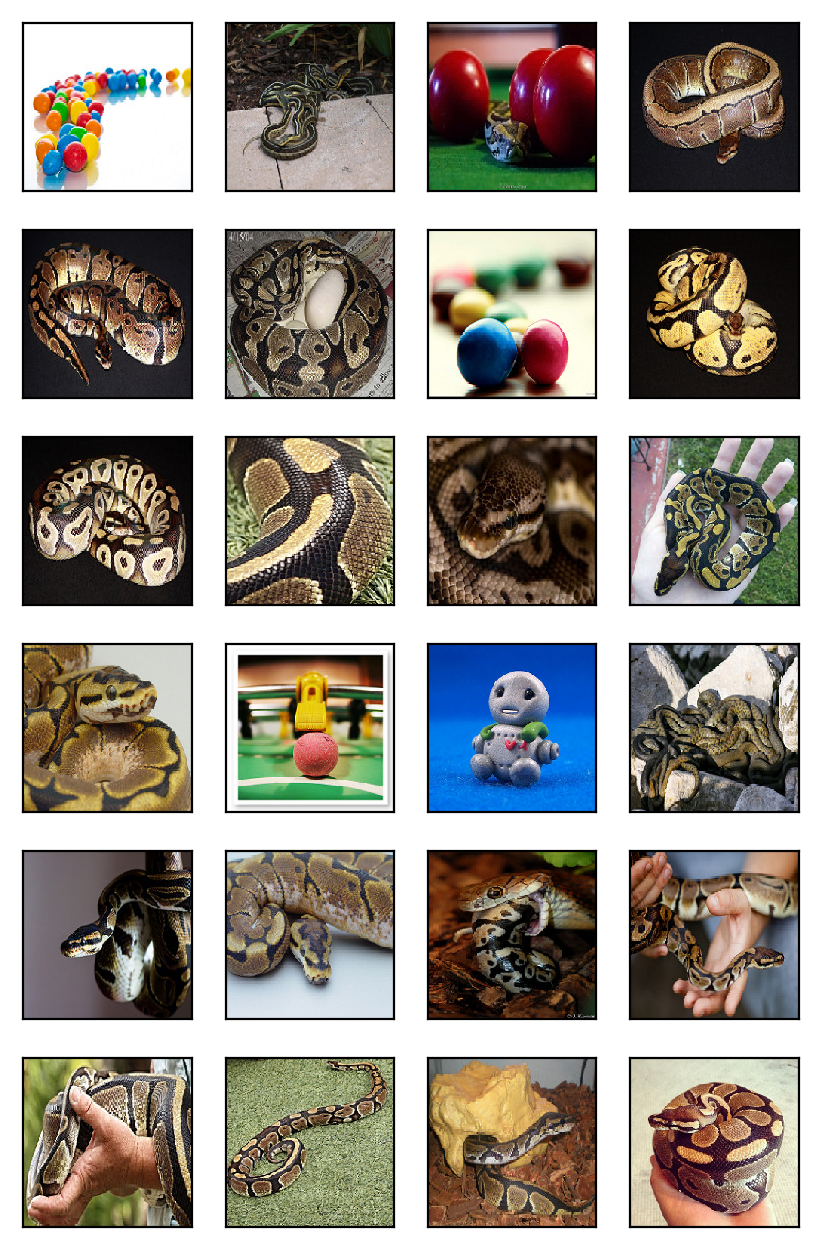

In [565]:
fig, axes = plt.subplots(6, 4, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(5, 8))
for img, ax in zip(images_ball, axes.ravel()):
    ax.imshow(img)

In [529]:
X.shape

(200, 224, 224, 3)

In [530]:
from keras.applications.vgg16 import preprocess_input
X_pre = preprocess_input(X)
features = model.predict(X_pre)

In [531]:
features.shape

(200, 7, 7, 512)

In [532]:
features_ = features.reshape(200, -1)

In [537]:
from sklearn.model_selection import train_test_split
y = np.zeros(200, dtype='int')
y[100:] = 1
X_train, X_test, y_train, y_test = train_test_split(features_, y, stratify=y)

In [548]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV().fit(X_train, y_train)

In [549]:
print(lr.score(X_train, y_train))

1.0


In [550]:
print(lr.score(X_test, y_test))

0.82


In [553]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr.predict(X_test))

array([[24,  1],
       [ 8, 17]])